<center>

### COSC2753 - Machine Learning

# **Exploratory Data Analysis (EDA)**

<center>────────────────────────────</center>
&nbsp;

## Table of Contents

</center>

<div style="text-align: left;">

<div style="display: inline-block; text-align: left;">

<h3>

[**I. Introduction**](#introduction)

</h3>

<h3>
    
[**II. Libraries Import and Data Preprocessing**](#libraries-import-and-data-preprocessing)

</h3>

<h4>

- [1. Importing Libraries](#1-importing-libraries)

</h4>

<h4>

- [2. Global Configuration](#2-global-configuration)

</h4>

<h4>

- [3. Data Loading](#3-data-loading)

</h4>

<h4>

- [4. Data Preprocessing](#4-data-preprocessing)

</h4>

<h5 style="margin-left: 20px;">

- [4.1. Data Types](#41-prerequisites)

</h5>

<h5 style="margin-left: 20px;">

- [4.2. Data Overview](#42-data-overview)

</h5>

<h5 style="margin-left: 20px;">

- [4.3. Data Validation](#43-data-validation)

</h5>

<h3>

[**III. Data Visualization**](#data-visualization)

</h3>

<h3>

[**IV. Data Cleaning**](#data-cleaning)

</h3>

<h3>

[**V. Exploratory Data Analysis**](#exploratory-data-analysis)

</h3>

<h3>
    
[**VI. Conclusion**](#conclusion)

</h3>

<h3>
    
[**VII. References**](#references)

</div>

&nbsp;

<center><em><sub>─────── End Of Section ───────</sub></em></center>


# I. Introduction


This notebook focuses on Exploratory Data Analysis (EDA) as the foundation for our machine learning workflow with the provided datasets. Through EDA, we will gain a comprehensive understanding of the data, including:

- Data cleaning and preprocessing.
- Features/Target variables distribution and relationships analysis.
- Correlation analysis.
- Outliers detection.
- Model selection and evaluation.

Upon finishing, this notebook will provide valuable insights of the data for subsequent stages.

<center><em><sub>─────── End Of Section ───────</sub></em></center>


# II. Libraries Import and Data Preprocessing


## 1. Importing Libraries


In [1]:
print("Importing packages...")

# Import installed python packages
import pandas as pd  # Data manipulation
import numpy as np  # Linear algebra
import seaborn as sns  # Visualization
import matplotlib  # Plotting
import sklearn  # Machine learning
import tabulate  # Pretty printing
import time  # Time tracking
import sys  # System specific parameters and functions
import importlib  # Importing modules

# Import user-defined python scripts
sys.path.append("../../")  # Root directory
modules_to_reload = [
    "scripts.outlier_detector",
    "scripts.styler",
    "scripts.neko",
    "scripts.utils",
]

# Reload modules if they have been modified
start_time = time.time()  # Start time
missing_modules = []  # Missing modules

# Reload modules
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])
    else:
        missing_modules.append(module_name)

# Recache missing modules
if missing_modules:
    print(f"Modules {missing_modules} not found. \nRecaching...")


# Import specific modules after reloading
from scripts.styler import Styler
from scripts.neko import Neko
from scripts.utils import Utils

# Version checking
print("Checking package versions...")

try:
    with open("../../requirements.txt", "r") as file:
        requirements = file.readlines()
except FileNotFoundError:
    print(f"File '../../requirements.txt' not found.")

# Check package versions
packages_to_check = [np, pd, sns, matplotlib, tabulate, sklearn]

for package in packages_to_check:
    Utils.version_check(package, requirements=requirements)

end_time = time.time()  # End time
runtime = end_time - start_time  # Runtime

print(f">>> Done in: {round(runtime, 3)}, seconds")

Importing packages...
Modules ['scripts.outlier_detector', 'scripts.styler', 'scripts.neko', 'scripts.utils'] not found. 
Recaching...
Checking package versions...
>>> numpy is up to date: 1.26.4
>>> pandas is up to date: 2.2.1
>>> seaborn is up to date: 0.13.2
>>> matplotlib is up to date: 3.8.3
>>> tabulate is up to date: 0.9.0
>>> sklearn is up to date: 1.4.1.post1
>>> Done in: 0.004, seconds


## 2. Global Configuration


In [2]:
# Set global parameters
start_time = time.time()
print("Initializing project...")

# Initialize objects
styler = Styler()  # Text Styler
neko = Neko()  # Panda extension
bullet = ">>>"  # Bullet point
plt = matplotlib.pyplot  # Matplotlib

end_time = time.time()
runtime = end_time - start_time

# Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 3)

print(f"{bullet} Project initialized successfully...\n")

print(f"{bullet} Done in: {round(runtime, 3)} seconds")

Initializing project...


    /\_____/\
   /  o   o  \
  ( ==  ^  == )       Neko has arrived!
   )         (        An data visualizing extension for analyzing DataFrames.
  (           )       Art: https://www.asciiart.eu/animals/cats.
 ( (  )   (  ) )
(__(__)___(__)__)

>>> Project initialized successfully...

>>> Done in: 0.0 seconds


## 3. Data Loading


In [3]:
# Load the datasets
try:
    start_time = time.time()

    df_train = pd.read_csv("../../data/raw/data_train.csv")

    styler.draw_box("Dataset Overview")

    # Get data essence
    df_train_essense = neko.essense(df_train)

    print(df_train_essense)

    end_time = time.time()
    runtime = end_time - start_time
    print(f"\n>>> Done in: {round(runtime, 3)} seconds")  # Display runtime

except Exception as e:
    text = f" {bullet} Error: {str(e)}"
    print(text)

┌────────────────────┐
│  Dataset Overview  │
└────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
├────┼─────────────────────────────┼───────────┤
│  1 │ Number of Columns           │ 25        │
├────┼─────────────────────────────┼───────────┤
│  2 │ Data Types                  │ ['int64'] │
├────┼─────────────────────────────┼───────────┤
│  3 │ Total Missing Values        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  4 │ Columns with Missing Values │ []        │
├────┼─────────────────────────────┼───────────┤
│  5 │ Number of Duplicates        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  6 │ Memory Usage (MB)           │ 38.7      │
╰────┴─────────────────────────────┴───────────╯

>>> Done in: 0.218 seconds


### **Initial Data Exploration**

This initial exploration of the data yielded the following key observations:

- **Data Loading:** The dataset comprises approximately `200,000` rows and `25` columns. Given its size, careful selection of data cleaning and preprocessing techniques will be essential to ensure data quality and integrity for further analysis.

- **Data Type Consistency:** A positive aspect is that all columns possess the same data type (`int64`), potentially simplifying the data cleaning process.

- **Missing Value Assessment:** An initial check for missing values (`null`, `NaN`, or `empty values`) was conducted. This ensures the data is not empty or containing invalid values.

- **Duplicate Detection:** No duplicates were identified within the dataset at this stage (with the presence of the `Id` column).

### **Feature Explanation**

| Variable             | Description                                                                                                                                                                  | Category    |
| -------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- |
| ID                   | Patient ID                                                                                                                                                                   | Numerical   |
| Status               | 0 = no diabetes, 1 = prediabetes or diabetes                                                                                                                                 | Categorical |
| HighBP               | 0 = no high BP, 1 = high BP                                                                                                                                                  | Categorical |
| HighChol             | 0 = no high cholesterol, 1 = high cholesterol                                                                                                                                | Categorical |
| CholCheck            | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                                                                                    | Categorical |
| BMI                  | Body Mass Index                                                                                                                                                              | Numerical   |
| Smoker               | 0 = no, 1 = yes (smoked at least 100 cigarettes in lifetime)                                                                                                                 | Categorical |
| Stroke               | 0 = no, 1 = yes (history of stroke)                                                                                                                                          | Categorical |
| HeartDiseaseorAttack | 0 = no, 1 = yes (coronary heart disease or myocardial infarction)                                                                                                            | Categorical |
| PhysActivity         | 0 = no, 1 = yes (physical activity in past 30 days, excluding job)                                                                                                           | Categorical |
| Fruits               | 0 = no, 1 = yes (consume fruit ≥ 1 time per day)                                                                                                                             | Categorical |
| Veggies              | 0 = no, 1 = yes (consume vegetables ≥ 1 time per day)                                                                                                                        | Categorical |
| HvyAlcoholConsump    | 0 = no, 1 = yes (heavy alcohol consumption)                                                                                                                                  | Categorical |
| AnyHealthcare        | 0 = no, 1 = yes (health care coverage)                                                                                                                                       | Categorical |
| NoDocbcCost          | 0 = no, 1 = yes (unable to see doctor due to cost)                                                                                                                           | Categorical |
| GenHlth              | Scale 1-5: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor                                                                                                        | Categorical |
| MentHlth             | Number of days in past 30 days with poor mental health (scale 1-30 days)                                                                                                     | Numerical   |
| PhysHlth             | Number of days in past 30 days with poor physical health (scale 1-30 days)                                                                                                   | Numerical   |
| DiffWalk             | 0 = no, 1 = yes (serious difficulty walking or climbing stairs)                                                                                                              | Categorical |
| Sex                  | 0 = female, 1 = male                                                                                                                                                         | Categorical |
| Age                  | 13-level age category: 1 = 18-24, 9 = 60-64, 13 = 80 or older                                                                                                                | Categorical |
| Education            | Scale 1-6: 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1-3 years, 6 = College 4+ years | Categorical |
| Income               | Scale 1-8: 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more                                                                                                 | Categorical |
| ExtraMedTest         | Result of an extra medical test (range -100 to 100)                                                                                                                          | Numerical   |
| ExtraAlcoholTest     | Result of an extra alcohol test (range -100 to 100)                                                                                                                          | Numerical   |

### **Conclusion**

- The `Id` column will be excluded in accordance with project specifications.

- This initial exploration reveals that the majority of the columns contain `categorical` features. This suggests a potential focus on `categorical data analysis` techniques for further exploration and model selection.

- An initial examination of the target variable (`Status`) reveals it consists of binary values (`0` or `1`). This characteristic indicates a `classification` problem, where we aim to predict the category (`0` or `1`) for new data points.

  &rArr; Given this binary nature, `Logistic Regression` emerges as a strong candidate for the initial model selection.


## 4. Data Preprocessing


### 4.1. Prerequisites


In [4]:
# Remove the Id column from the dataset as required
df_train.drop("Id", axis=1, inplace=True)

styler.draw_box("Dataset Overview (Id column removed)")

# Display data overview
print(df_train.info())

┌────────────────────────────────────────┐
│  Dataset Overview (Id column removed)  │
└────────────────────────────────────────┘
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHl

### 4.2. Data Overview


In [5]:
# Check for duplicates in the dataset
duplicates = df_train.duplicated().sum()  # Count duplicates

styler.draw_box("Duplicate Checking (Id column removed)")

if duplicates > 0:
    print(neko.essense(df_train))  # Display data essence
    print()

    # Print message about duplicates
    message = f"Found {duplicates} duplicates in the dataset"
    styled_message = styler.style(message, bold=True, italic=True)
    print(f"{bullet} {styled_message}")

    # Remove duplicates
    print(f"{bullet} Removing duplicates...")

    start_time = time.time()
    df_train.drop_duplicates(inplace=True)  # Remove duplicates
    end_time = time.time()

    runtime = end_time - start_time  # Runtime
    print(f"{bullet} Done in:", round(runtime, 3), "seconds")
else:
    # If no duplicates found
    message = "No duplicates in the dataset"
    styled_message = styler.style(message, bold=True, italic=True)
    print(f"{bullet} {styled_message}")

print()

# Display data essence after removal
styler.draw_box("Duplicate Checking After Removal")
print(neko.essense(data=df_train))

┌──────────────────────────────────────────┐
│  Duplicate Checking (Id column removed)  │
└──────────────────────────────────────────┘
╭────┬─────────────────────────────┬───────────╮
│    │ Attribute                   │ Value     │
├────┼─────────────────────────────┼───────────┤
│  0 │ Number of Rows              │ 202944    │
├────┼─────────────────────────────┼───────────┤
│  1 │ Number of Columns           │ 24        │
├────┼─────────────────────────────┼───────────┤
│  2 │ Data Types                  │ ['int64'] │
├────┼─────────────────────────────┼───────────┤
│  3 │ Total Missing Values        │ 0         │
├────┼─────────────────────────────┼───────────┤
│  4 │ Columns with Missing Values │ []        │
├────┼─────────────────────────────┼───────────┤
│  5 │ Number of Duplicates        │ 208       │
├────┼─────────────────────────────┼───────────┤
│  6 │ Memory Usage (MB)           │ 37.2      │
╰────┴─────────────────────────────┴───────────╯

>>> Found 208 duplicates in the

### **Conclusion**

- Following the removal of the `Id` column, an initial analysis identified `208` duplicate data points within the dataset.

  &rArr; To ensure data integrity and quality, these duplicates will be `removed` from the dataset before proceeding with further analysis.


In [6]:
# Display the overview of the training dataset
styler.draw_box("Dataset Description")
df_train.describe()

┌───────────────────────┐
│  Dataset Description  │
└───────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.384,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-7.416,-7.566,0.176
std,0.495,0.494,0.190,6.614,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,76.031,75.965,0.381
min,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-199.000,-199.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,98.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,199.000,199.000,1.000


In [7]:
# Display the first few rows of the training dataset
styler.draw_box("Daset Overview (First 5 rows)")
df_train.head()

┌─────────────────────────────────┐
│  Daset Overview (First 5 rows)  │
└─────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


### 4.3. Data Validation


#### 4.3.1: Handling Missing Values


In [8]:
# Check for missing / numpy.NaN / None values in the training dataset
styler.draw_box("Null/NaN values checking")
print(f"{bullet} {neko.is_nan(df_train)}")

┌────────────────────────────┐
│  Null/NaN values checking  │
└────────────────────────────┘
>>> The DataFrame does not contain any NaN values.


#### 4.3.2: Detect Noisy Data


In [9]:
zero_one_columns_error = []  # 0-1 columns with errors
range_columns_error = []  # Range columns with errors

# Columhns with 0 and 1 values
zero_one_columns = [
    "Status",
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]

# Columns with range defined in the dataset description
range_column = {
    "Age": (0, 13),
    "Education": (1, 6),
    "Income": (1, 8),
    "BMI": (16, 45),
    "ExtraMedTest": (-100, 100),
    "ExtraAlcoholTest": (-100, 100),
    "MentHlth": (0, 30),
    "PhysHlth": (0, 30),
    "GenHlth": (1, 5),
}

In [10]:
# Data Validation for 0-1 columns
styler.draw_box("Data Validation (0-1 columns)")

# Results after checking for invalid values
result = []

# Check for invalid values in the training dataset
for column in zero_one_columns:
    # Check for invalid values
    payload = neko.is_data_valid(data=df_train, column=column, valid_values=[0, 1])

    # Append to the error list
    if not payload["is_valid"]:
        zero_one_columns_error.append(column)

    # Show the results
    styled_text = styler.style(payload["message"], bold=True, italic=True)

    result.append([column, styled_text])

# Display the results in a table
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌─────────────────────────────────┐
│  Data Validation (0-1 columns)  │
└─────────────────────────────────┘
╭────┬──────────────────────┬──────────────────────────────────╮
│    │ Column               │ Status                           │
├────┼──────────────────────┼──────────────────────────────────┤
│  0 │ Status               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  1 │ HighBP               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  2 │ HighChol             │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  3 │ CholCheck            │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  4 │ Smoker               │ All values are within the range. │
├────┼──────────────────────┼──────────────────────────────────┤
│  5 │ Stroke               │ All values are wi

In [11]:
# Data validation for range-based columns
styler.draw_box("Data validation (range-based columns)")

# Results after checking for invalid values
result = []

# Check each column against its range
for column, (min_value, max_value) in range_column.items():
    # Check for invalid values
    payload = neko.is_data_in_range(df_train, column, min_value, max_value)

    # Append to the error list if invalid values found
    if not payload["is_valid"]:
        range_columns_error.append(column)

    # Style the message
    styled_message = styler.style(payload["message"], bold=True, italic=True)

    result.append([column, styled_message])

# Display the results in a table
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌─────────────────────────────────────────┐
│  Data validation (range-based columns)  │
└─────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ BMI              │ 4013 invalid values found.       │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraMedTest     │ 29515 invalid values found.      │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ ExtraAlcoholTest │ 29464 invalid values found.      │
├────┼────────

### **Key Observations**

The previous data exploration revealed the following key findings:

- **Missing Values**: The dataset exhibits no missing values. All values in the specified columns (`zero_one_columns`) are confirmed to be either `0` or `1`.

- **Outliers**: Several columns, including `BMI`, `ExtraMedTest`, `ExtraAlcoholTest`, `MenHlth`, and `PhysHlth`, contain outliers that fall outside the allowed range defined in the assignment instructions:

  - **BMI**: The Body Mass Index (BMI) values are expected to fall within the range of `16` to `45`. Outliers outside this range will be addressed, according to Connor B. Weir for BMI Classification Percentile [1].

  - **ExtraMedTest** and **ExtraAlcoholTest**: The values are expected to fall within the range of `-100` to `100`. Outliers outside this range will be addressed. (As per the assignment instructions)

  - **MentHlth** and **PhysHlth**: The features are expected to have values ranging from 1 to 30. However, it's possible that some patients may not report any mental or physical health concerns, potentially resulting in a value of 0. This scenario requires special attention during data cleaning.

### **Addressing Outliers for Improved Data Quality:**

- Outliers can potentially influence the results of our analysis. To ensure data quality and integrity, we will employ a common technique of `winsorizing` outliers, replacing extreme values (outliers) with values at pre-defined thresholds.

- This approach aims to mitigate the impact of extreme values while preserving the overall distribution of the data.


#### 4.3.3: Handling invalid data


In [12]:
# Enforcing Data Range
styler.draw_box("Enforcing Data Range")

result = []  # Results after handling invalid values

try:
    start_time = time.time()  # Start time

    # Handle columns with range violations
    for column in range_columns_error:
        max_value = range_column[column][1]  # Max value
        min_value = range_column[column][0]  # Min value
        df_train[column] = df_train[column].apply(
            lambda x: (
                min_value if x < min_value else (max_value if x > max_value else x)
            )
        )

        # Display success message
        text = f"Column '{column}' has been handled successfully"
        styled_text = styler.style(text, bold=True, italic=True)
        print(f"{bullet} {styled_text}")

    # Display overall success message
    text = "All columns have been handled successfully"
    styled_text = styler.style(text, bold=True, italic=True)
    print(f"{bullet} {styled_text}")

    end_time = time.time()  # End time
    runtime = end_time - start_time  # Runtime
    print(f"{bullet} Done in:", round(runtime, 3), "seconds")

except KeyError as e:
    # Handle KeyError
    styler.draw_box(f"Error: Column '{e}' not found in the DataFrame.")

┌────────────────────────┐
│  Enforcing Data Range  │
└────────────────────────┘
>>> Column 'BMI' has been handled successfully
>>> Column 'ExtraMedTest' has been handled successfully
>>> Column 'ExtraAlcoholTest' has been handled successfully
>>> All columns have been handled successfully
>>> Done in: 0.135 seconds


#### 4.3.4: Data Revalidation


In [13]:
# Display the status of invalid values after handling

result = []  # Results after checking for invalid values

styler.draw_box("Data Validation (range-based) After Processing")

# Check each column against its range
for column, (min_value, max_value) in range_column.items():
    # Check for invalid values
    payload = neko.is_data_in_range(df_train, column, min_value, max_value)

    # Append to the error list
    if not payload["is_valid"]:
        range_columns_error.append(column)

    result.append([column, payload["message"]])

# Display the status of invalid values after handling
table = tabulate.tabulate(
    result,
    headers=["Column", "Status"],
    tablefmt="rounded_grid",
    stralign="left",
    showindex=True,
)

print(table)

┌──────────────────────────────────────────────────┐
│  Data Validation (range-based) After Processing  │
└──────────────────────────────────────────────────┘
╭────┬──────────────────┬──────────────────────────────────╮
│    │ Column           │ Status                           │
├────┼──────────────────┼──────────────────────────────────┤
│  0 │ Age              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  1 │ Education        │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  2 │ Income           │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  3 │ BMI              │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  4 │ ExtraMedTest     │ All values are within the range. │
├────┼──────────────────┼──────────────────────────────────┤
│  5 │ ExtraAlcoholTest │ All values are within 

In [14]:
# Display the overview of the training dataset after handling invalid values
styler.draw_box("Dataset Description After Processing")
df_train.describe()

┌────────────────────────────────────────┐
│  Dataset Description After Processing  │
└────────────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.00,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000,202736.000
mean,0.429,0.425,0.963,28.209,0.443,0.041,0.094,0.756,0.635,0.811,0.056,0.951,0.084,2.515,3.20,4.261,0.169,0.440,8.039,5.049,6.054,-4.451,-4.598,0.176
std,0.495,0.494,0.190,5.823,0.497,0.198,0.293,0.429,0.481,0.391,0.230,0.215,0.277,1.070,7.43,8.740,0.375,0.496,3.052,0.986,2.070,62.239,62.224,0.381
min,0.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,1.000,1.000,1.000,-100.000,-100.000,0.000
25%,0.000,0.000,1.000,24.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,6.000,4.000,5.000,-55.000,-55.000,0.000
50%,0.000,0.000,1.000,27.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,2.000,0.00,0.000,0.000,0.000,8.000,5.000,7.000,0.000,0.000,0.000
75%,1.000,1.000,1.000,31.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,3.000,2.00,3.000,0.000,1.000,10.000,6.000,8.000,40.000,40.000,0.000
max,1.000,1.000,1.000,45.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5.000,30.00,30.000,1.000,1.000,13.000,6.000,8.000,100.000,100.000,1.000


In [15]:
# Display the first 5 rows of the training dataset after handling invalid values
styler.draw_box("Dataset Overview After Processing")
df_train.head()

┌─────────────────────────────────────┐
│  Dataset Overview After Processing  │
└─────────────────────────────────────┘


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,1,24,1,0,0,1,0,1,0,1,0,2,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,0,1,0,1,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,0,1,1,3,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,0,1,0,3,0,0,0,0,8,6,8,-83,-100,0
4,0,1,1,27,0,0,0,1,0,1,0,1,0,3,0,0,0,0,9,5,4,-58,0,0


In [16]:
# Save the cleaned dataset
start_time = time.time()  # Start time

df_train.to_csv("../../data/cleaned/data_train_cleaned.csv", index=False)

end_time = time.time()  # End time
runtime = end_time - start_time  # Runtime

text = f"Dataset saved successfully in {round(runtime, 3)} seconds"

styler.draw_box("Dataset Saving")

print(f"{bullet} {text}")

┌──────────────────┐
│  Dataset Saving  │
└──────────────────┘
>>> Dataset saved successfully in 0.57 seconds


<center><em><sub>─────── End Of Section ───────</sub></em></center>


# III. Univariate Analysis


## 1. Configuration


In [17]:
# Save the cleaned dataset
df_train_cleaned = df_train.copy()  # Create a copy of the original dataset

## 2. Feature Analysis 


In [18]:
# # Grid initialization
# rows, cols = len(df_train_cleaned.columns) // 4, min(4, len(df_train_cleaned.columns))
# fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))  # Figure and axes

# # Plot KDE for each column
# for i, column in enumerate(df_train_cleaned.columns):
#     sns.kdeplot(
#         data=df_train_cleaned[column], ax=axes.flat[i], fill=True, color="#ff2c43"
#     )  # KDE plot
#     axes.flat[i].set_title(f"KDE Plot of {column}")  # Title
#     axes.flat[i].set_xlabel(column, fontsize=12)  # X-axis label

# plt.tight_layout()
# plt.show()

### **Conclusion**:

**Analysis of Feature Distributions:**

Our examination reveals several key points about the data distribution:

- **Categorical Features:** These features (e.g., `HighBP`, `Smoker`, `Sex`) take on discrete values (`0/1`) and will be treated as **binary**.

- **Ordinal Features:** Features like `Age`, `Education`, and `Income` have multiple categories with an inherent order. We'll consider them as **ordinal** during analysis.

- **Numerical Features:** These features hold continuous values. Notably, `BMI` exhibits a skewed distribution.

**Skewed Distributions:**

Some numerical features, including `BMI`, `ExtraMedTest`, and `MentHlth`, show skewed distributions. We'll address this using scaling techniques before applying models that assume normality.

**Imbalanced Data:**

The target variable (`Status`) has an imbalanced distribution, with more instances of `0` than `1`. This can bias models. We'll address this imbalance using techniques like **undersampling** or **oversampling** to ensure fair model performance. It's also worth noting that other features like `Fruits`, `Vegetables`, and `Smoker` might also be imbalanced and require further investigation.

### **Next Steps**:

- **Feature Analysis:** Explore individual features and their relationship to the target variable to understand their importance and potential interactions.

- **Base Model Selection:** Choose an appropriate initial model (e.g., **_Logistic Regression_**, **_Random Forest_**, **_Decision Tree_**) based on the feature distributions and target variable.


### 2.1: Configuration


In [19]:
from scripts.outlier_detector import OutlierDetector

# Initialize the OutlierDetector object
outlier_detector = OutlierDetector()

# Display feature essence for a column
def data_overview(column_name: str, data: pd.DataFrame):
    """
    Function to provide an overview of a column in the DataFrame.

    Parameters:
        column_name (str): The name of the column to analyze.
        data (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """

    print(f"Feature Essence ({column_name})")
    start_time = time.time()

    print(neko.feature_essence(data, column_name, tablefmt="rounded_grid"))

    end_time = time.time()
    runtime = end_time - start_time
    print(f"\n>>> Done in: {round(runtime, 3)} seconds")

### 2.2: Target Variable (`Status`)


#### 2.2.1: Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


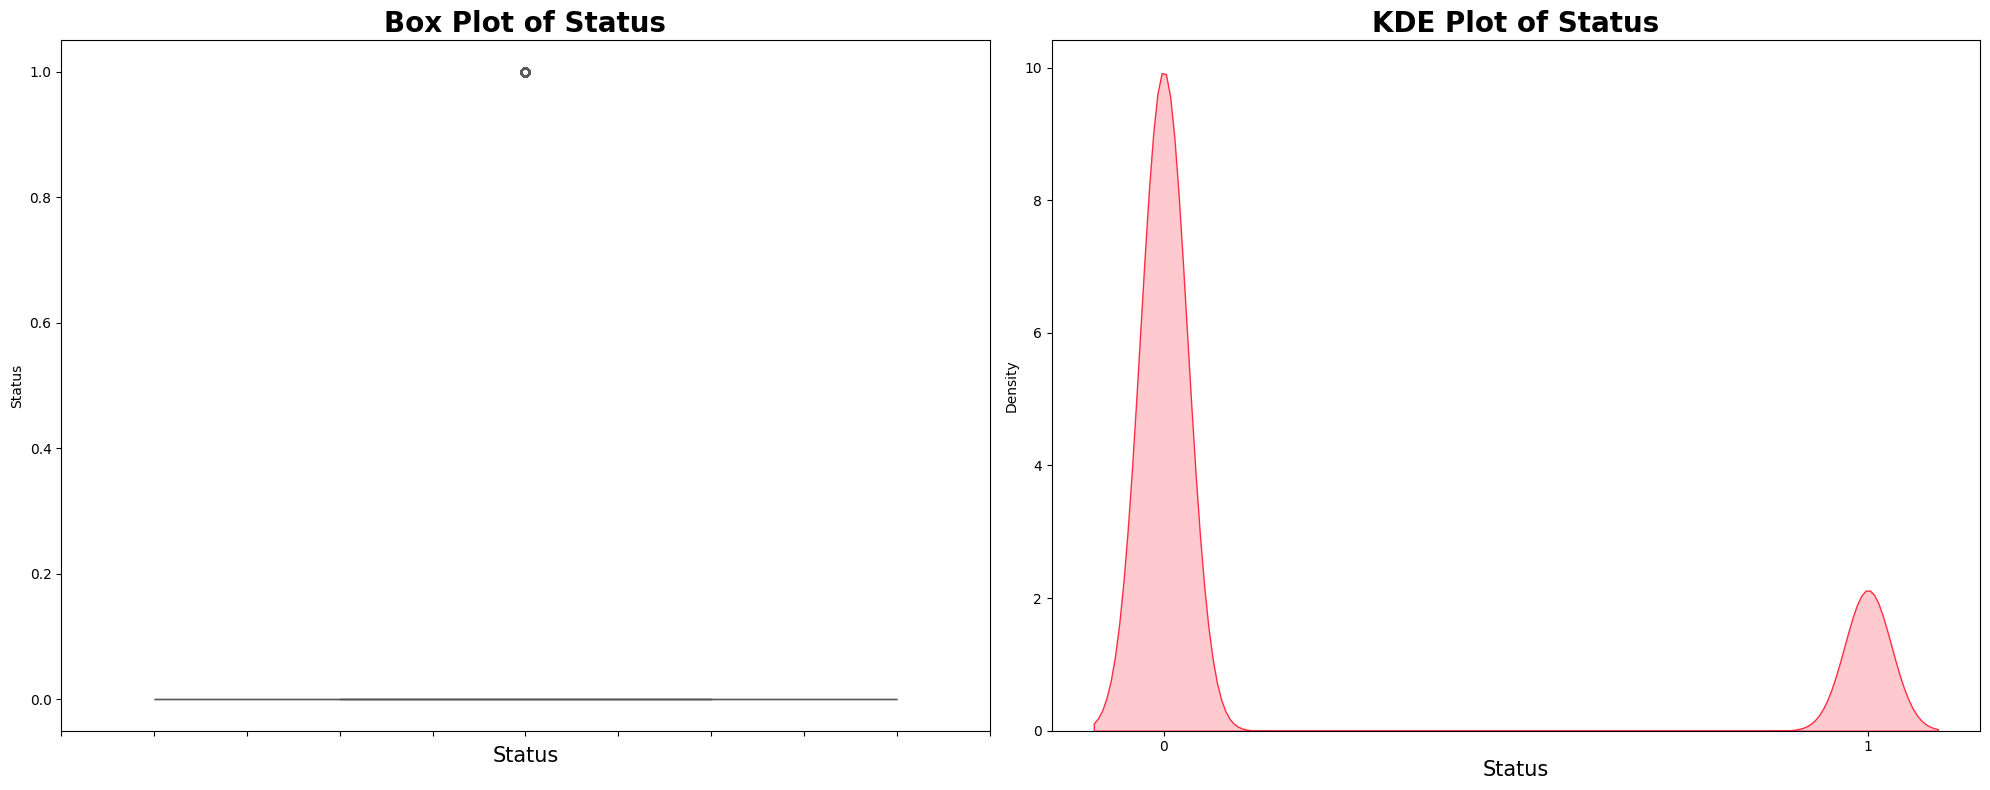

In [20]:
neko.data_visualization("Status", df_train_cleaned)

#### 2.2.2: Data Overview


In [21]:
data_overview("Status", df_train_cleaned)

Feature Essence (Status)
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ Status              │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  8 │ 75th Percentile   

#### 2.2.3: Frequency Distribution


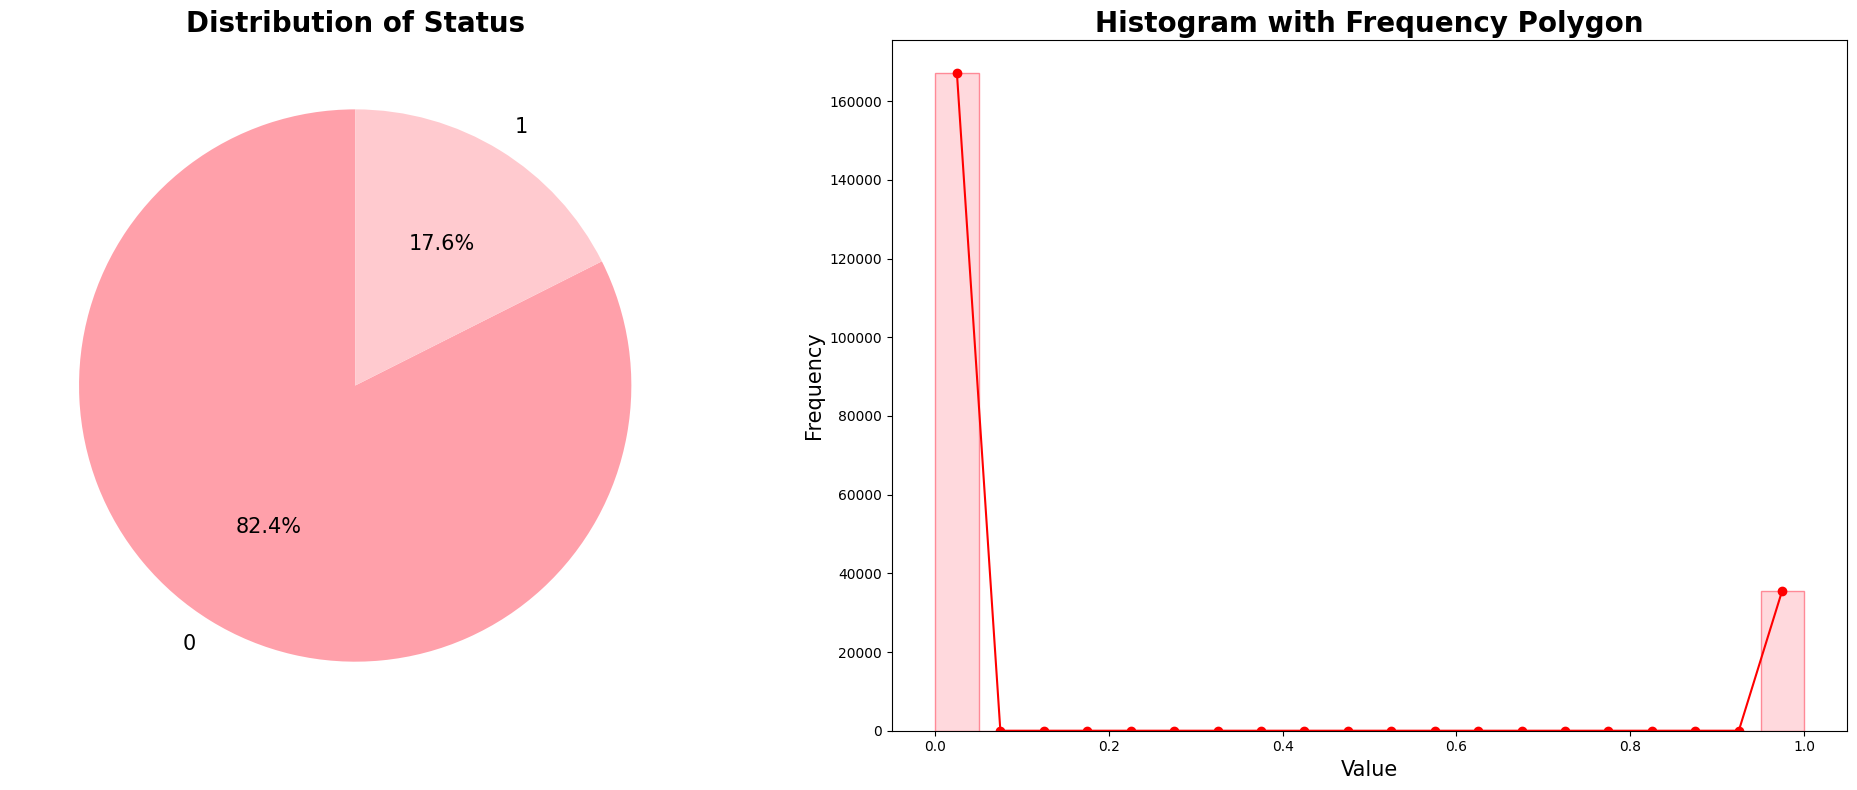

In [22]:
neko.data_frequency("Status", df_train_cleaned)

#### 2.2.4: Outliers Detection

In [23]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Status"]))

╭─────────────────┬─────────╮
│ Key             │  Value  │
├─────────────────┼─────────┤
│ Unique Outliers │    1    │
├─────────────────┼─────────┤
│ Lower Bound     │    0    │
├─────────────────┼─────────┤
│ Upper Bound     │    0    │
├─────────────────┼─────────┤
│ Threshold       │   1.5   │
├─────────────────┼─────────┤
│ Total Outliers  │  35631  │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The target variable (`Status`) exhibits an imbalanced distribution, with a significantly higher proportion of instances belonging to class `0` (`82.4%`). Such a distribution poses challenges for predictive modeling, as models may become biased towards the majority class.

- **Mitigation Strategy:**
  To address this imbalance and ensure fair model performance across both classes, we will consider techniques like undersampling or oversampling during model training. The specific technique will be chosen based on the outcome of the model performance evaluation.

- **Outliers:**
  As the data is categorical, the concept of outliers is less relevant for the target variable. However, we will continue to explore outliers in other features to ensure data quality and integrity.

- **Classification Task:**
  We will identify the problem as a binary classification task, aiming to predict whether a patient has diabetes (1) or not (0).


### 2.3: High Blood Pressure (`HighBP`)


#### 2.3.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


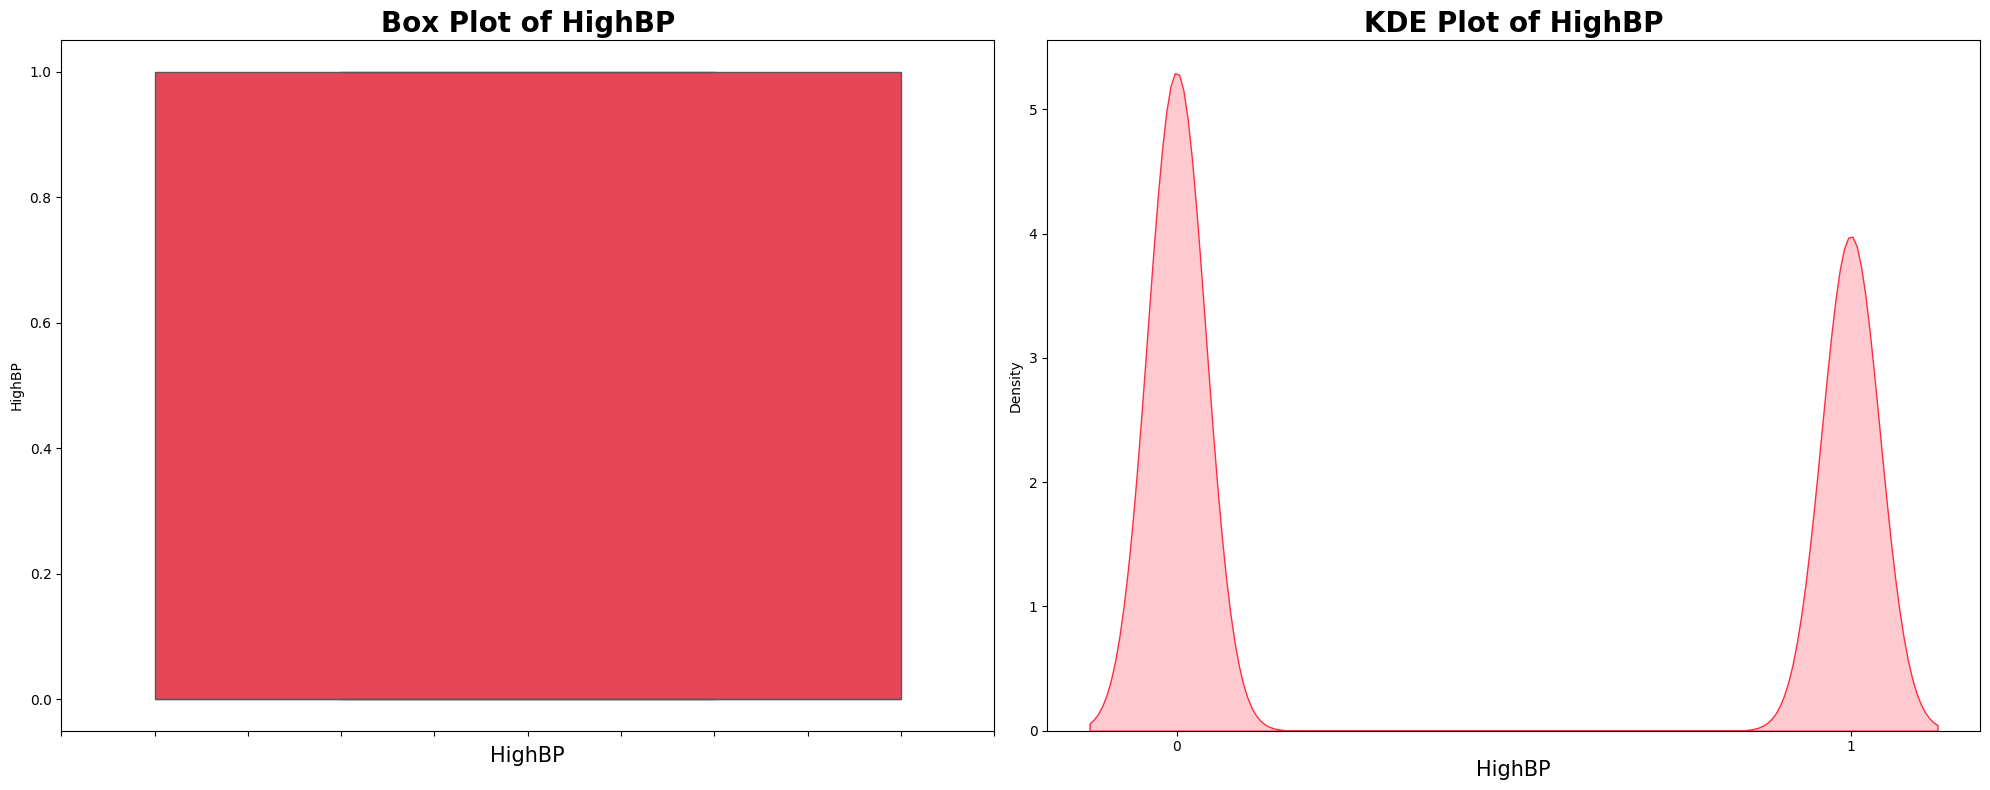

In [24]:
neko.data_visualization("HighBP", df_train_cleaned)

#### 2.3.2 Data Overview


In [25]:
data_overview("HighBP", df_train_cleaned)

Feature Essence (HighBP)
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ HighBP              │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  8 │ 75th Percentile   

#### 2.3.3 Frequency Distribution


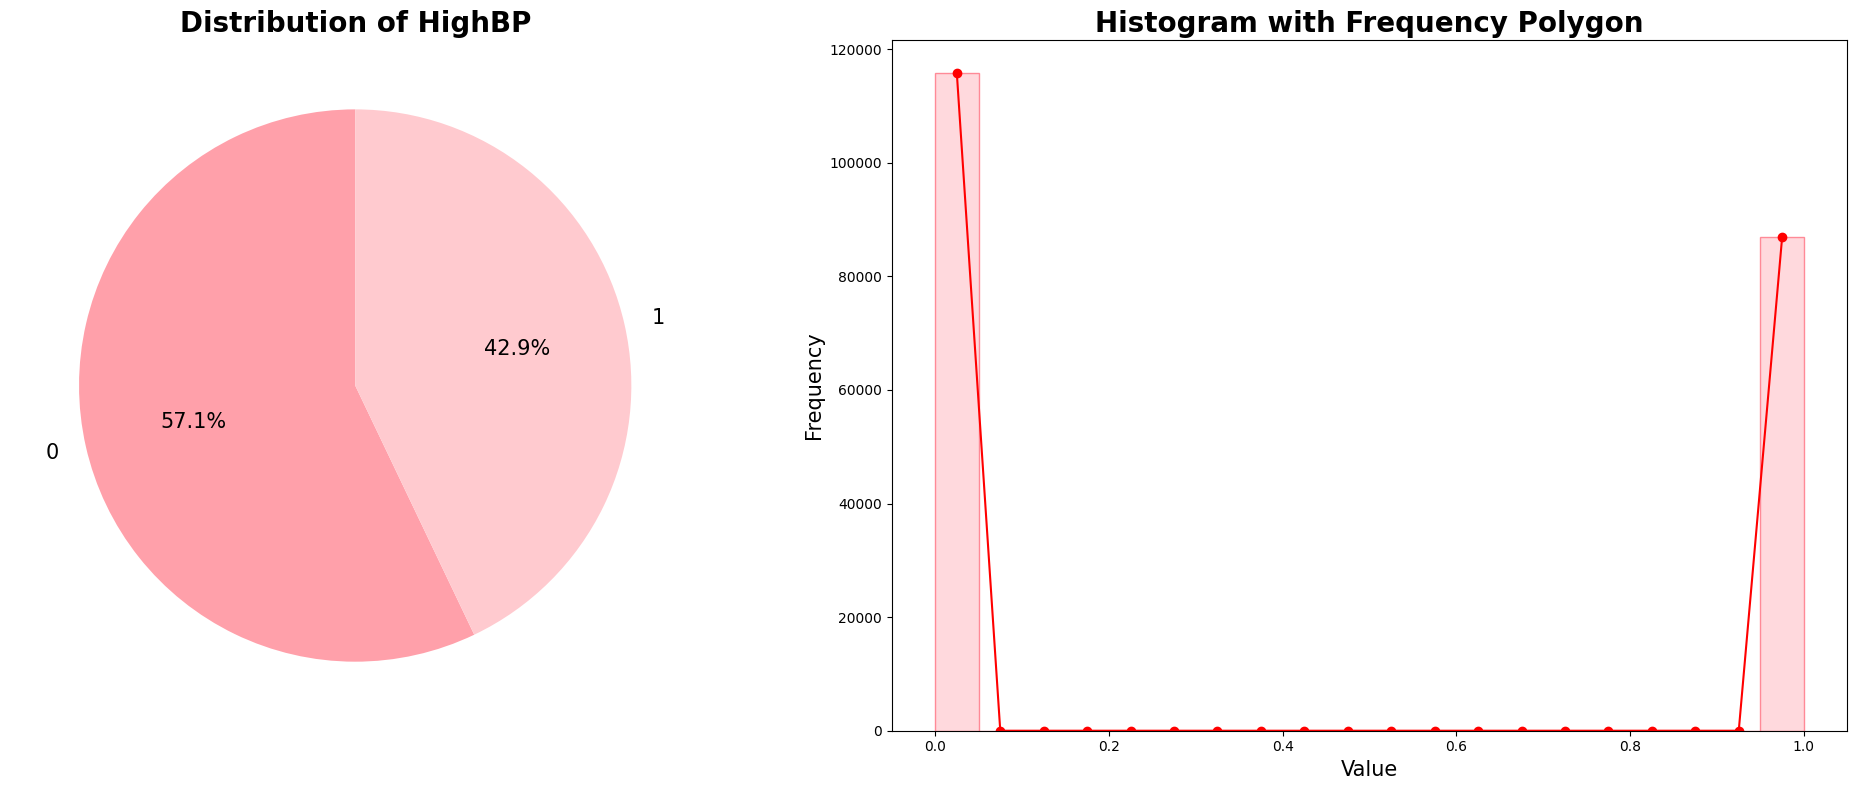

In [26]:
neko.data_frequency("HighBP", df_train_cleaned)

#### 2.3.4 Outliers Detection

In [27]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["HighBP"]))

╭─────────────────┬─────────╮
│ Key             │ Value   │
├─────────────────┼─────────┤
│ Unique Outliers │ None    │
├─────────────────┼─────────┤
│ Lower Bound     │ -1.5    │
├─────────────────┼─────────┤
│ Upper Bound     │ 2.5     │
├─────────────────┼─────────┤
│ Threshold       │ 1.5     │
├─────────────────┼─────────┤
│ Total Outliers  │ 0       │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `HighBP` exhibits a binary distribution, with the majority of patients having no high blood pressure (`0`). This distribution suggests that high blood pressure is less prevalent in the dataset.

- **Outliers:**
  The feature `HighBP` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.4: High Cholesterol (`HighChol`)


#### 2.4.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


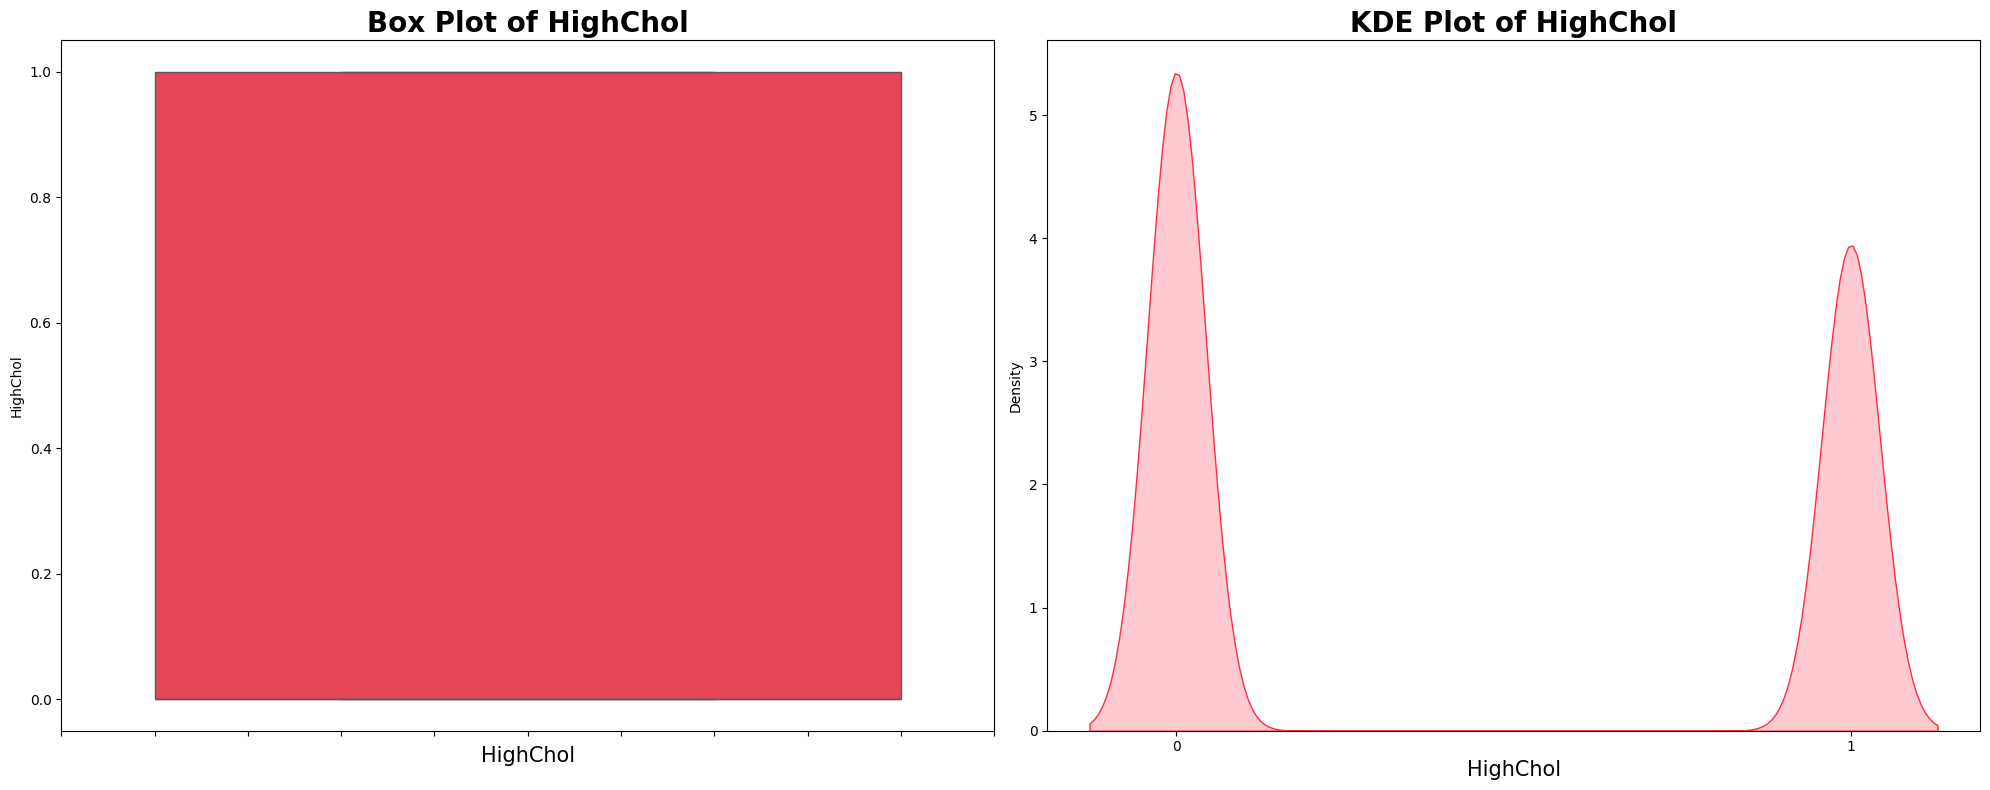

In [28]:
neko.data_visualization("HighChol", df_train_cleaned)

#### 2.4.2 Data Overview


In [29]:
data_overview("HighChol", df_train_cleaned)

Feature Essence (HighChol)
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ HighChol            │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  8 │ 75th Percentile 

#### 2.4.3 Frequency Distribution


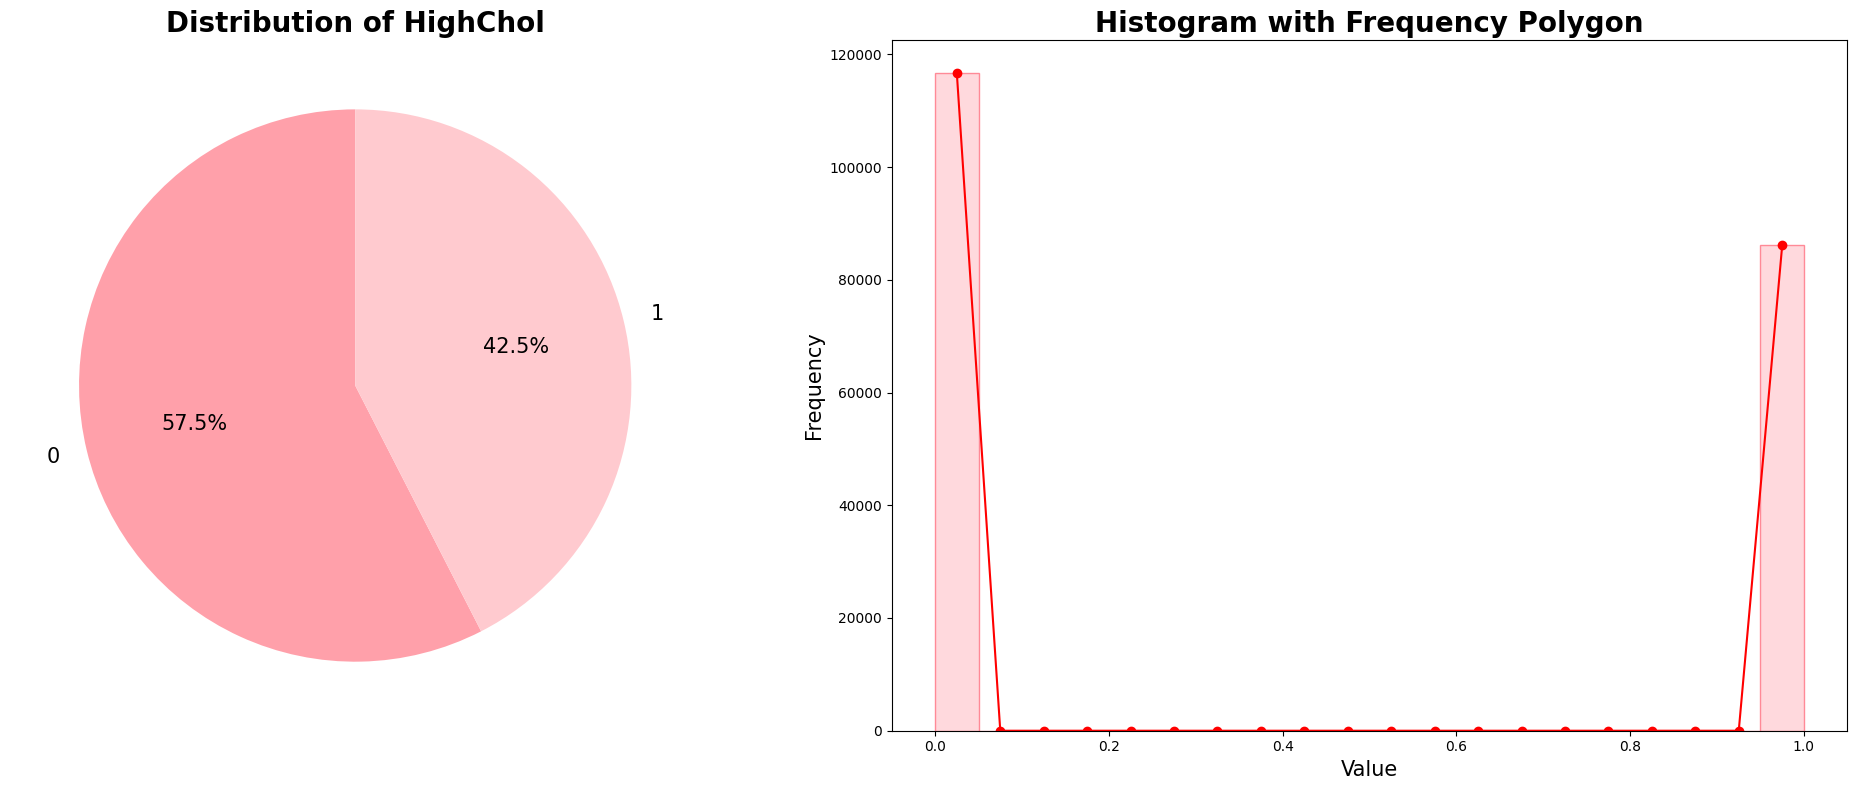

In [30]:
neko.data_frequency("HighChol", df_train_cleaned)

#### 2.4.4 Outliers Detection

In [31]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["HighChol"]))

╭─────────────────┬─────────╮
│ Key             │ Value   │
├─────────────────┼─────────┤
│ Unique Outliers │ None    │
├─────────────────┼─────────┤
│ Lower Bound     │ -1.5    │
├─────────────────┼─────────┤
│ Upper Bound     │ 2.5     │
├─────────────────┼─────────┤
│ Threshold       │ 1.5     │
├─────────────────┼─────────┤
│ Total Outliers  │ 0       │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `HighChol` exhibits a binary distribution, with the majority of patients having no high cholesterol (`0`). This distribution suggests that high cholesterol is less prevalent in the dataset.

- **Outliers:**
  The feature `HighChol` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.

### 2.5: Cholesterol Check (`CholCheck`)


#### 2.5.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


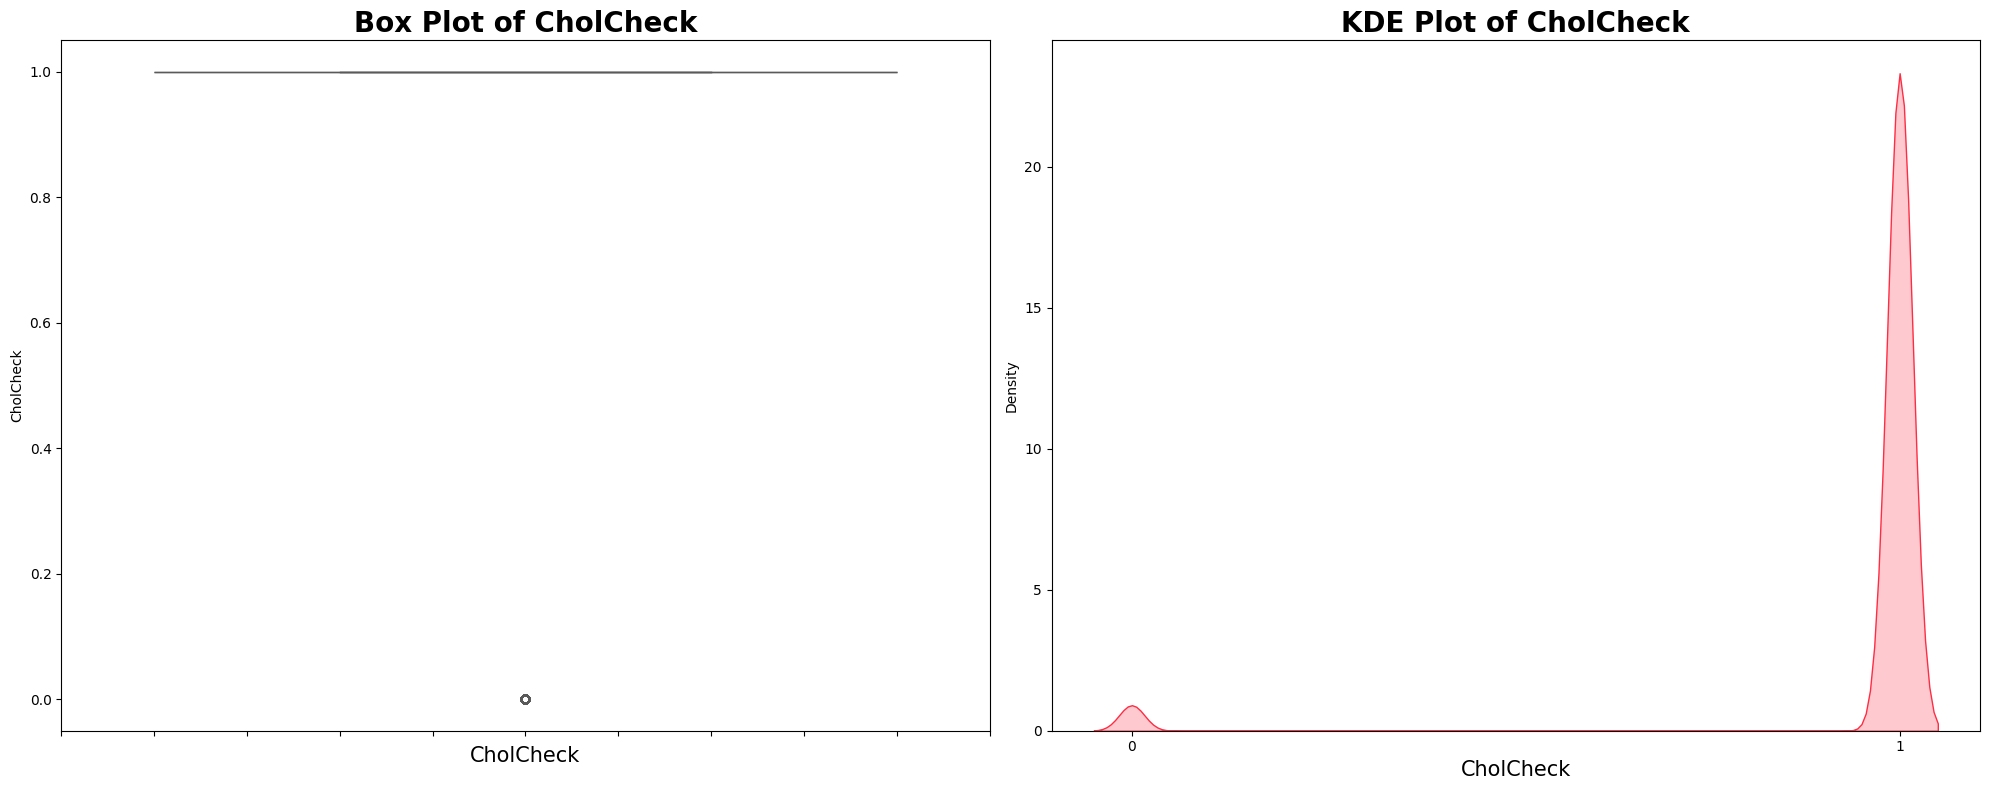

In [32]:
neko.data_visualization("CholCheck", df_train_cleaned)

#### 2.5.2 Data Overview


In [33]:
data_overview("CholCheck", df_train_cleaned)

Feature Essence (CholCheck)
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ CholCheck           │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 1.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 1.0                 │
├────┼────────────────────┼─────────────────────┤
│  8 │ 75th Percentile

#### 2.5.3 Frequency Distribution


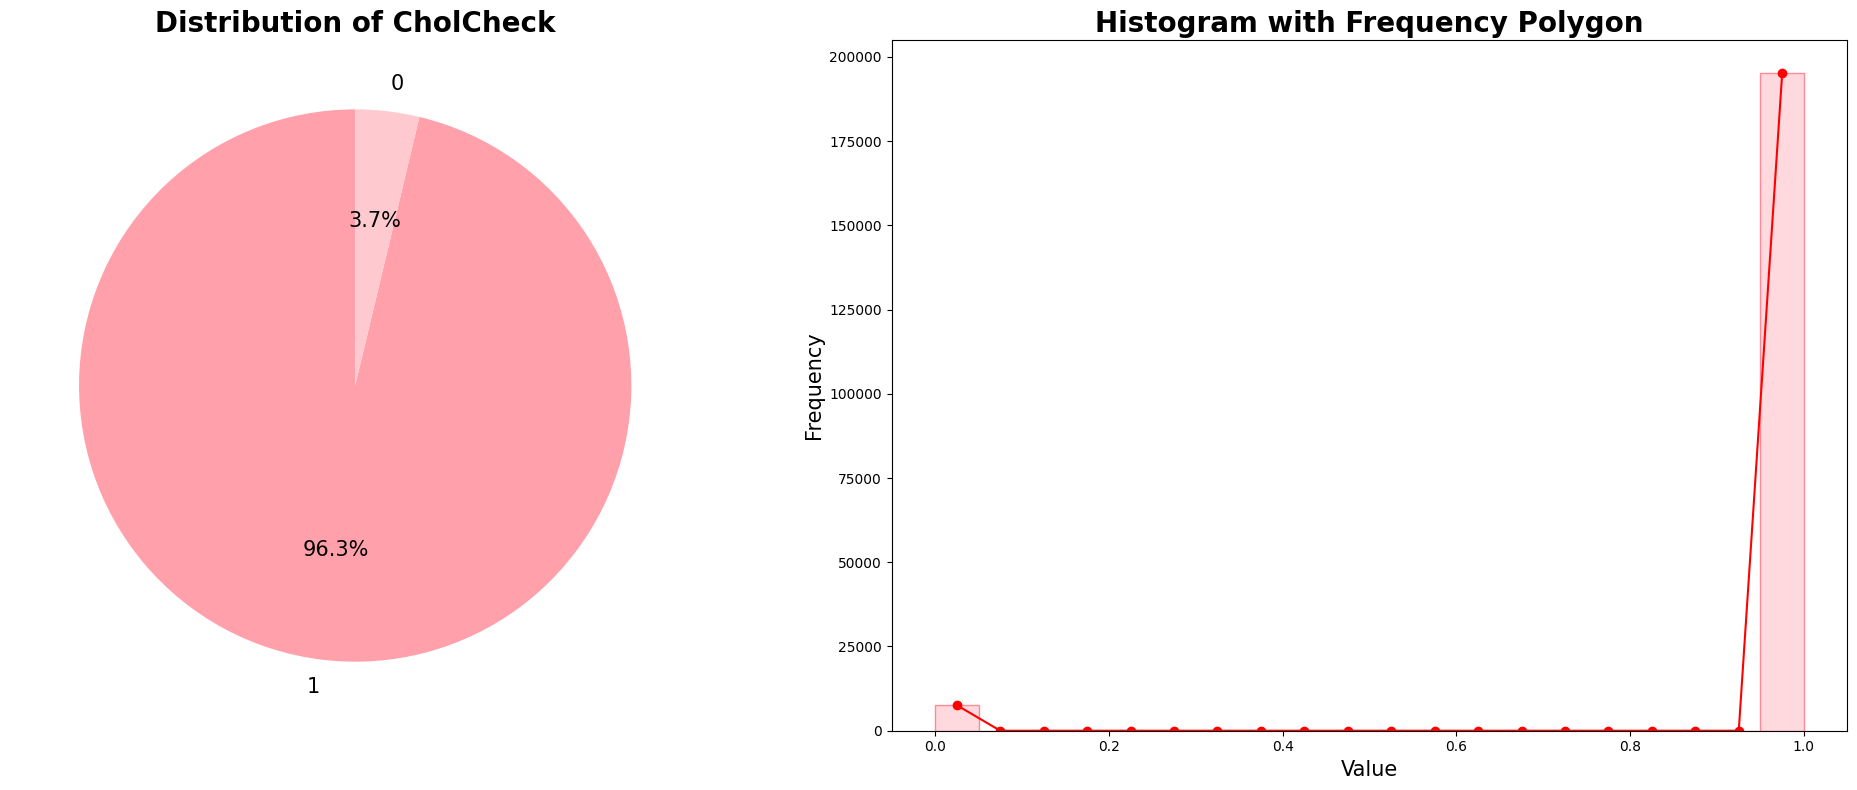

In [34]:
neko.data_frequency("CholCheck", df_train_cleaned)

#### 2.5.4 Outliers Detection

In [35]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["CholCheck"]))

╭─────────────────┬─────────╮
│ Key             │  Value  │
├─────────────────┼─────────┤
│ Unique Outliers │    0    │
├─────────────────┼─────────┤
│ Lower Bound     │    1    │
├─────────────────┼─────────┤
│ Upper Bound     │    1    │
├─────────────────┼─────────┤
│ Threshold       │   1.5   │
├─────────────────┼─────────┤
│ Total Outliers  │  7578   │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `CholCheck` exhibits a binary distribution, with the majority of patients having a cholesterol check in the past 5 years (`1`). This distribution suggests that cholesterol checks are less prevalent in the dataset.

- **Outliers:**
    The feature `CholCheck` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.6: Body Mass Index (`BMI`)


#### 2.6.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


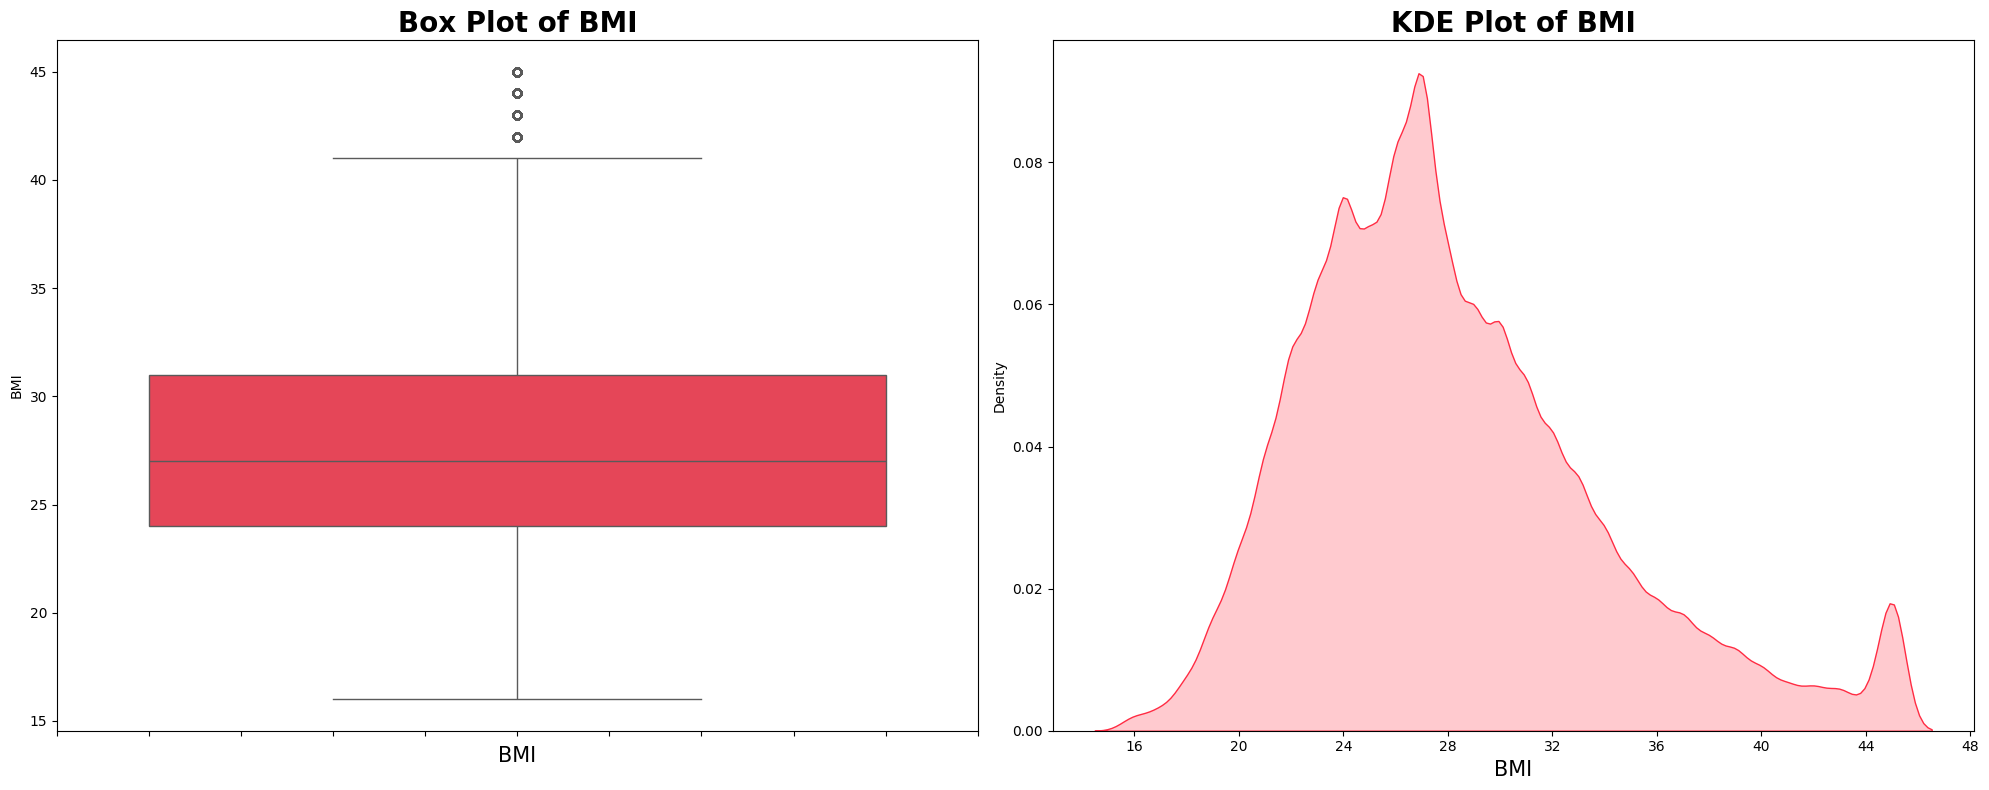

In [36]:
neko.data_visualization("BMI", df_train_cleaned)

#### 2.6.2 Data Overview


In [37]:
data_overview("BMI", df_train_cleaned)

Feature Essence (BMI)
╭────┬────────────────────┬────────────────────╮
│    │ Attribute          │ Value              │
├────┼────────────────────┼────────────────────┤
│  0 │ Feature            │ BMI                │
├────┼────────────────────┼────────────────────┤
│  1 │ Data Type          │ int64              │
├────┼────────────────────┼────────────────────┤
│  2 │ Total Values       │ 202736             │
├────┼────────────────────┼────────────────────┤
│  3 │ Missing Values     │ 0                  │
├────┼────────────────────┼────────────────────┤
│  4 │ Unique Values      │ 30                 │
├────┼────────────────────┼────────────────────┤
│  5 │ Minimum Value      │ 16                 │
├────┼────────────────────┼────────────────────┤
│  6 │ 25th Percentile    │ 24.0               │
├────┼────────────────────┼────────────────────┤
│  7 │ Median             │ 27.0               │
├────┼────────────────────┼────────────────────┤
│  8 │ 75th Percentile    │ 31.0               

#### 2.6.3 Frequency Distribution


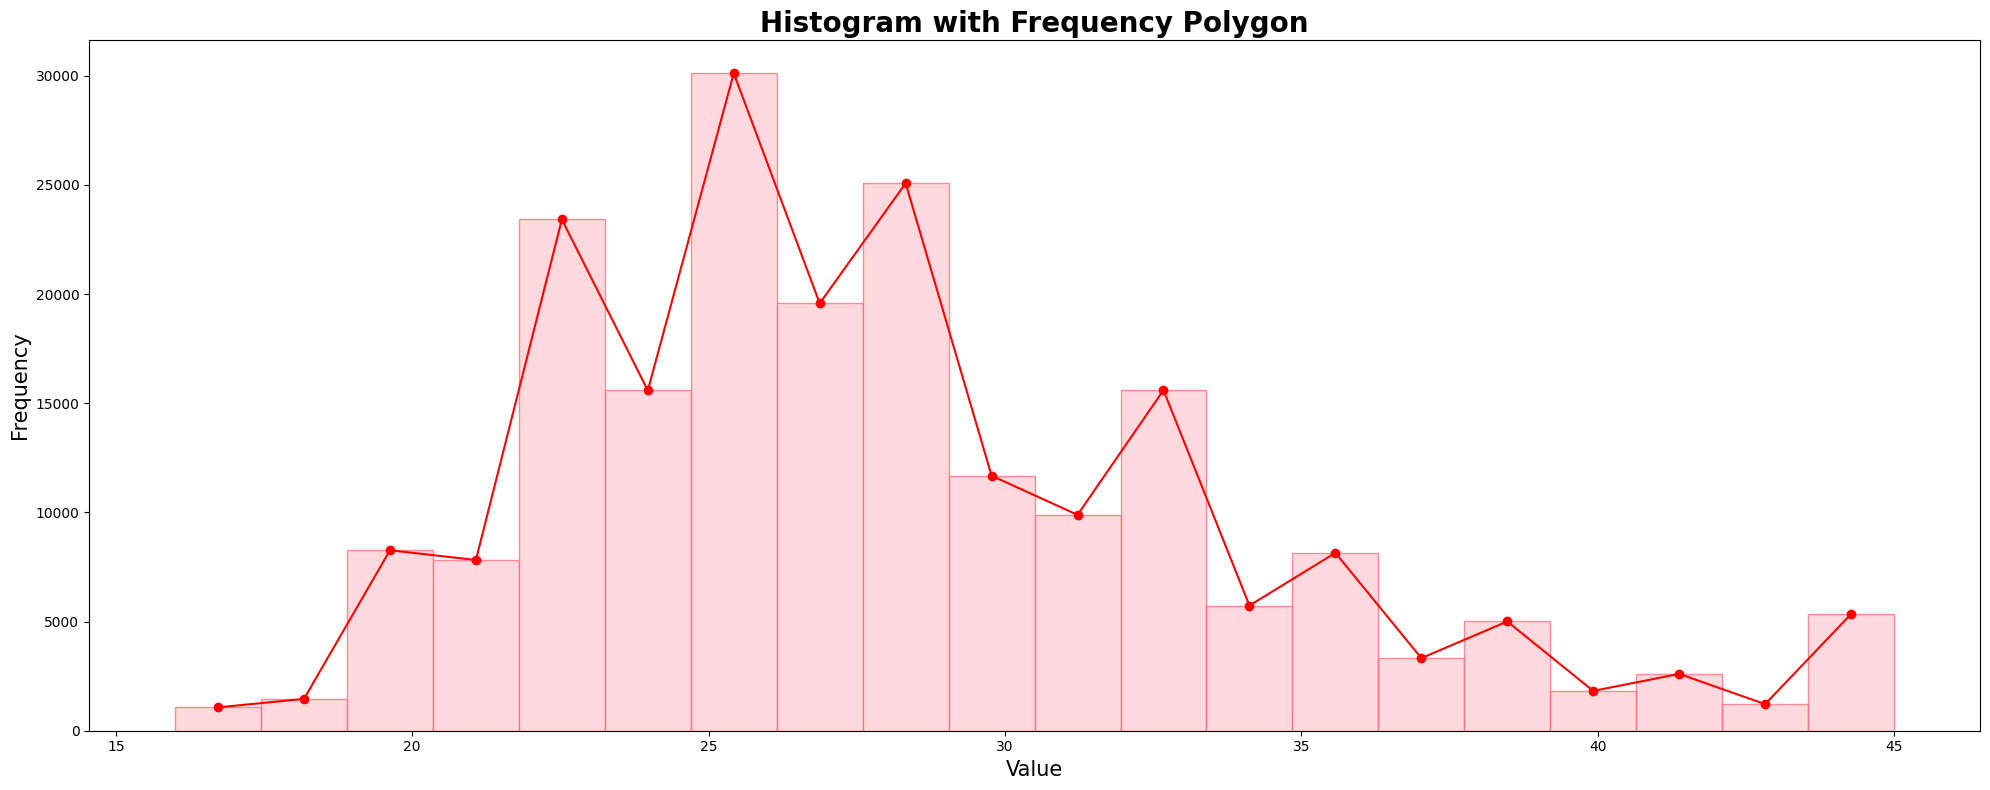

In [38]:
neko.data_frequency("BMI", df_train_cleaned, is_pie_chart=False)

#### 2.6.4 Outliers Detection

In [39]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["BMI"]))

╭─────────────────┬────────────────╮
│ Key             │ Value          │
├─────────────────┼────────────────┤
│ Unique Outliers │ 42, 43, 44, 45 │
├─────────────────┼────────────────┤
│ Lower Bound     │ 13.5           │
├─────────────────┼────────────────┤
│ Upper Bound     │ 41.5           │
├─────────────────┼────────────────┤
│ Threshold       │ 1.5            │
├─────────────────┼────────────────┤
│ Total Outliers  │ 7838           │
╰─────────────────┴────────────────╯


### **Conclusion**:

- **Distribution:**
  The `BMI` feature exhibits a positive skew, indicating a majority of patients have a BMI between 20 and 30 (considered normal range).

- **Outliers:**
  The data contains `7,838` outliers with BMIs outside the expected range (`13.5`-`45`), using IQR-range based method. We will later address these outliers using a more suitable detection method based on model performance evaluation (rather than solely IQR) and handle them appropriately in a later stage

- **Normalization:**
  Given the skewed distribution, we may consider applying scaling techniques to normalize the data before model training. This decision will be finalized after evaluating the impact on model performance.


### 2.7: Smoker (`Smoker`)


#### 2.7.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


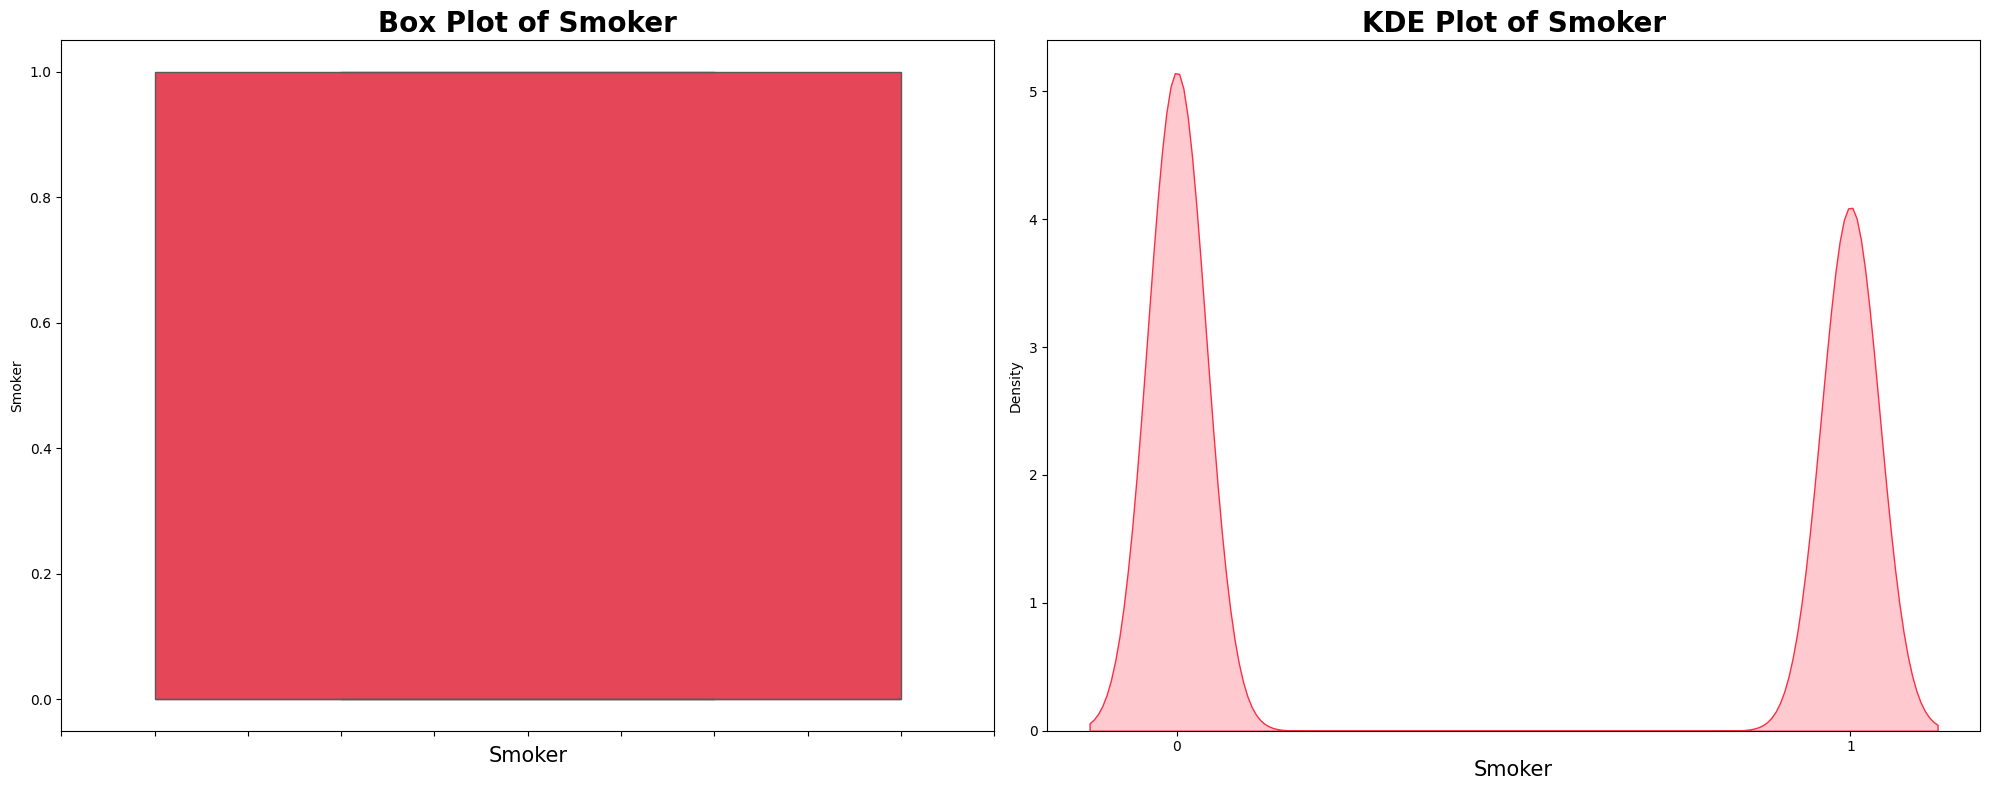

In [40]:
neko.data_visualization("Smoker", df_train_cleaned)

#### 2.7.2 Data Overview


In [41]:
data_overview("Smoker", df_train_cleaned)

Feature Essence (Smoker)
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ Smoker              │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 0.0                 │
├────┼────────────────────┼─────────────────────┤
│  8 │ 75th Percentile   

#### 2.7.3 Frequency Distribution


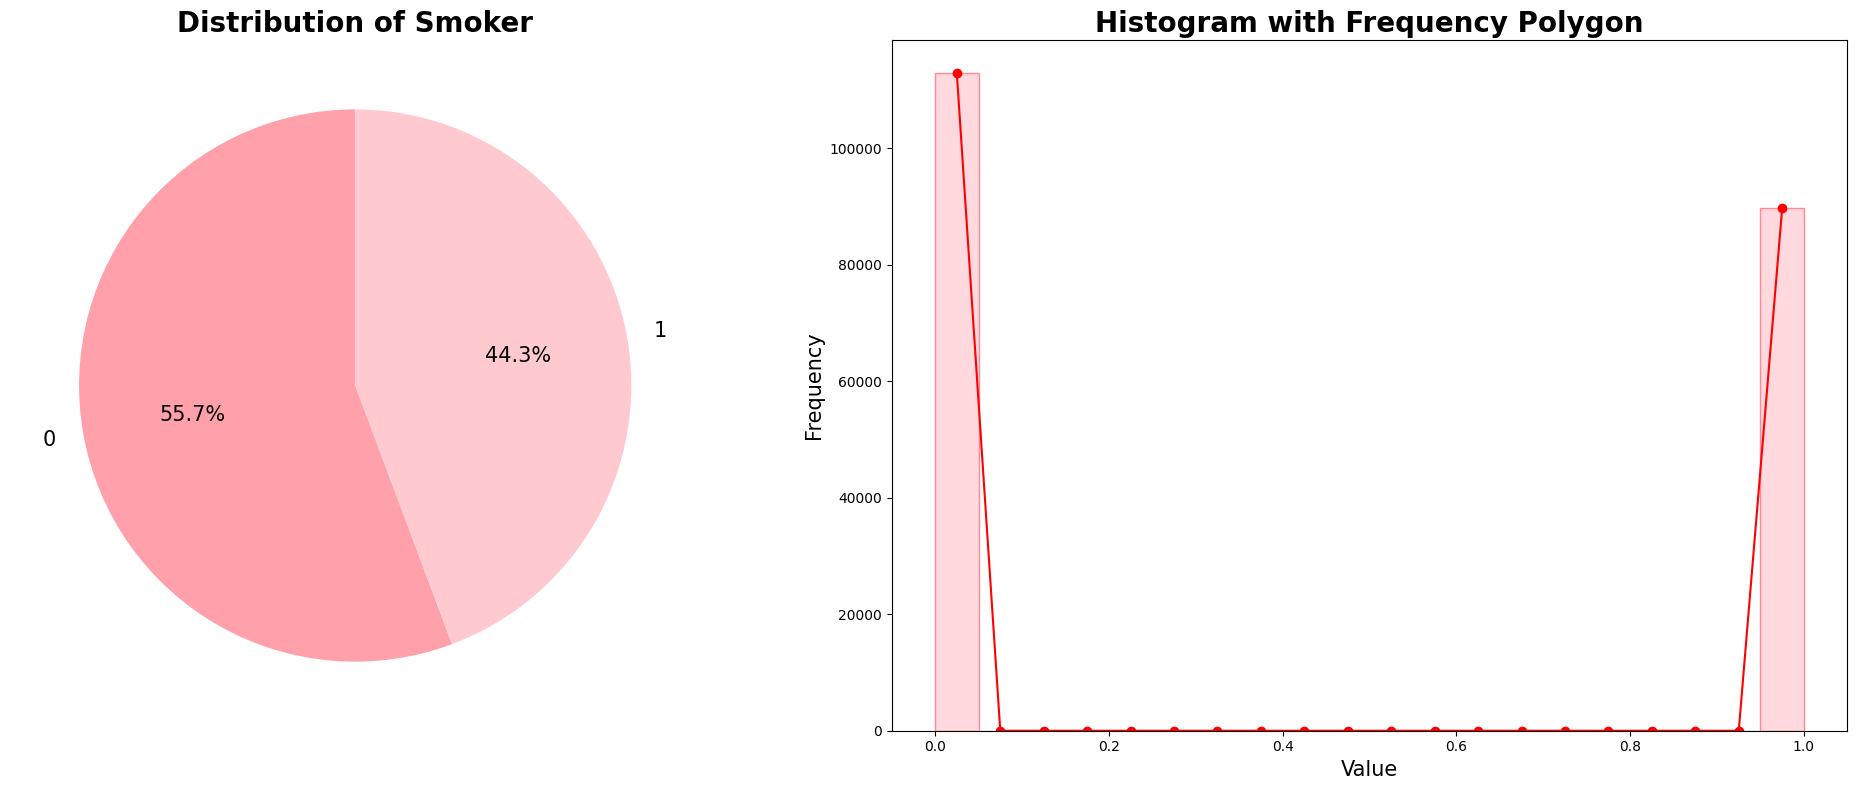

In [42]:
neko.data_frequency("Smoker", df_train_cleaned)

#### 2.7.4 Outliers Detection

In [43]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Smoker"]))

╭─────────────────┬─────────╮
│ Key             │ Value   │
├─────────────────┼─────────┤
│ Unique Outliers │ None    │
├─────────────────┼─────────┤
│ Lower Bound     │ -1.5    │
├─────────────────┼─────────┤
│ Upper Bound     │ 2.5     │
├─────────────────┼─────────┤
│ Threshold       │ 1.5     │
├─────────────────┼─────────┤
│ Total Outliers  │ 0       │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `Smoker` exhibits a binary distribution, with the majority of patients being non-smokers (`0`). This distribution suggests that smoking is less prevalent in the dataset.

- **Outliers:**
  The feature `Smoker` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.8: Stroke (`Stroke`)


#### 2.8.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


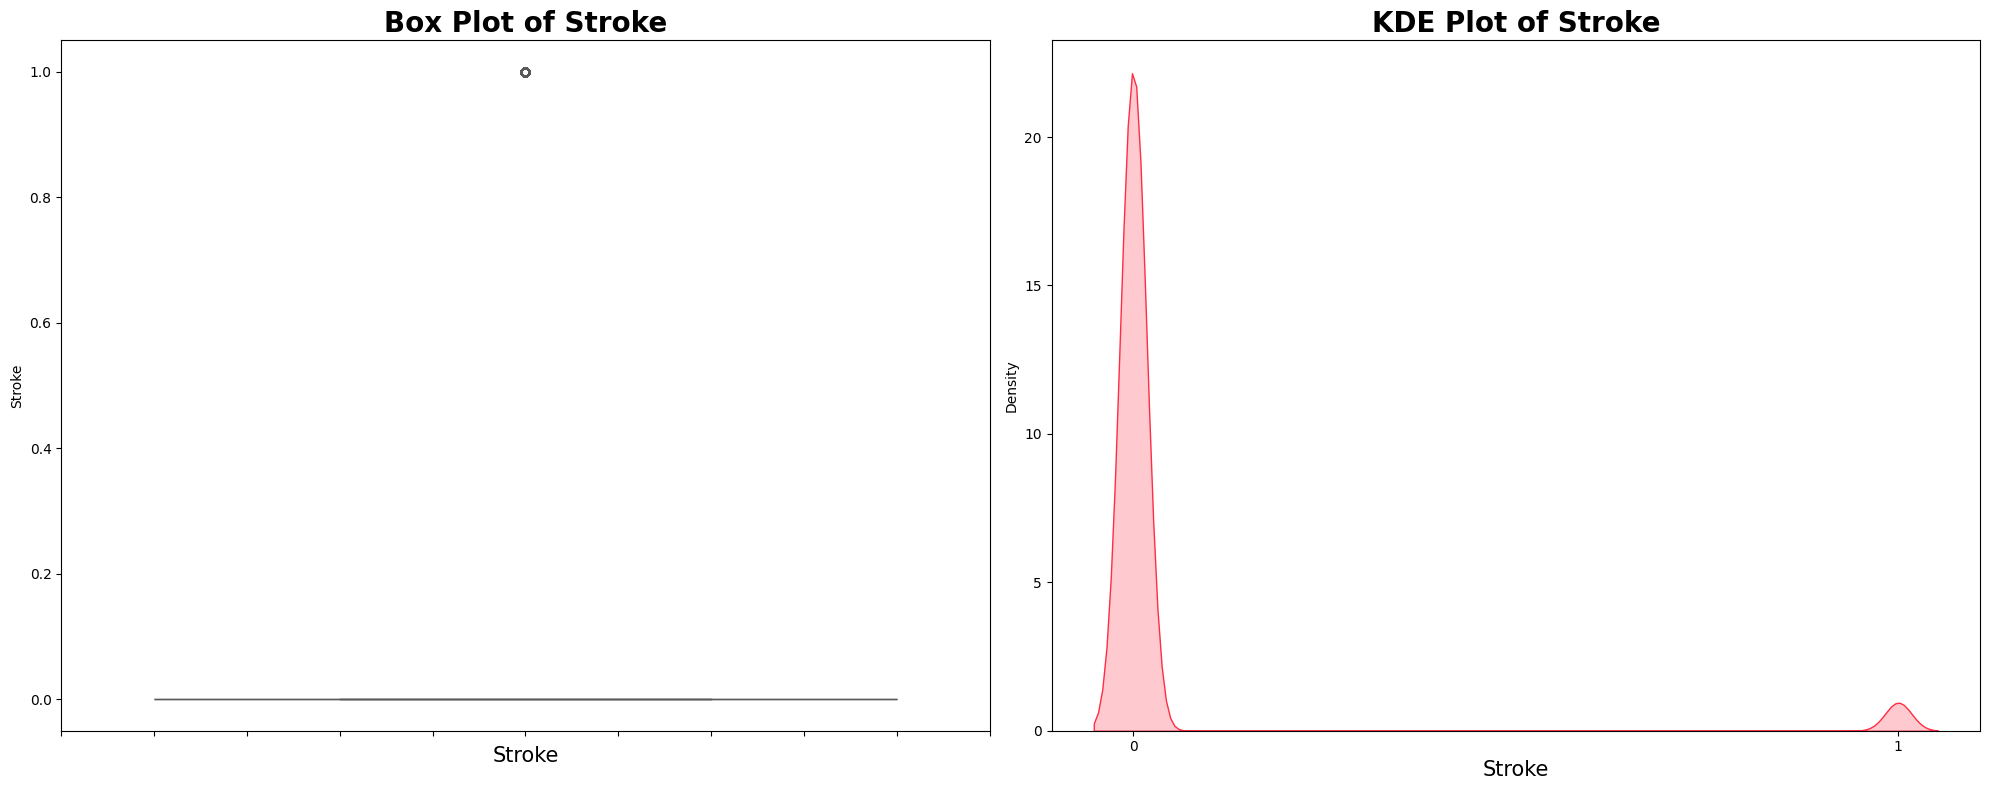

In [44]:
neko.data_visualization("Stroke", df_train_cleaned)

#### 2.8.2 Data Overview


In [45]:
data_overview("Stroke", df_train_cleaned)

Feature Essence (Stroke)
╭────┬────────────────────┬──────────────────────╮
│    │ Attribute          │ Value                │
├────┼────────────────────┼──────────────────────┤
│  0 │ Feature            │ Stroke               │
├────┼────────────────────┼──────────────────────┤
│  1 │ Data Type          │ int64                │
├────┼────────────────────┼──────────────────────┤
│  2 │ Total Values       │ 202736               │
├────┼────────────────────┼──────────────────────┤
│  3 │ Missing Values     │ 0                    │
├────┼────────────────────┼──────────────────────┤
│  4 │ Unique Values      │ 2                    │
├────┼────────────────────┼──────────────────────┤
│  5 │ Minimum Value      │ 0                    │
├────┼────────────────────┼──────────────────────┤
│  6 │ 25th Percentile    │ 0.0                  │
├────┼────────────────────┼──────────────────────┤
│  7 │ Median             │ 0.0                  │
├────┼────────────────────┼──────────────────────┤
│  8 │

#### 2.8.3 Frequency Distribution


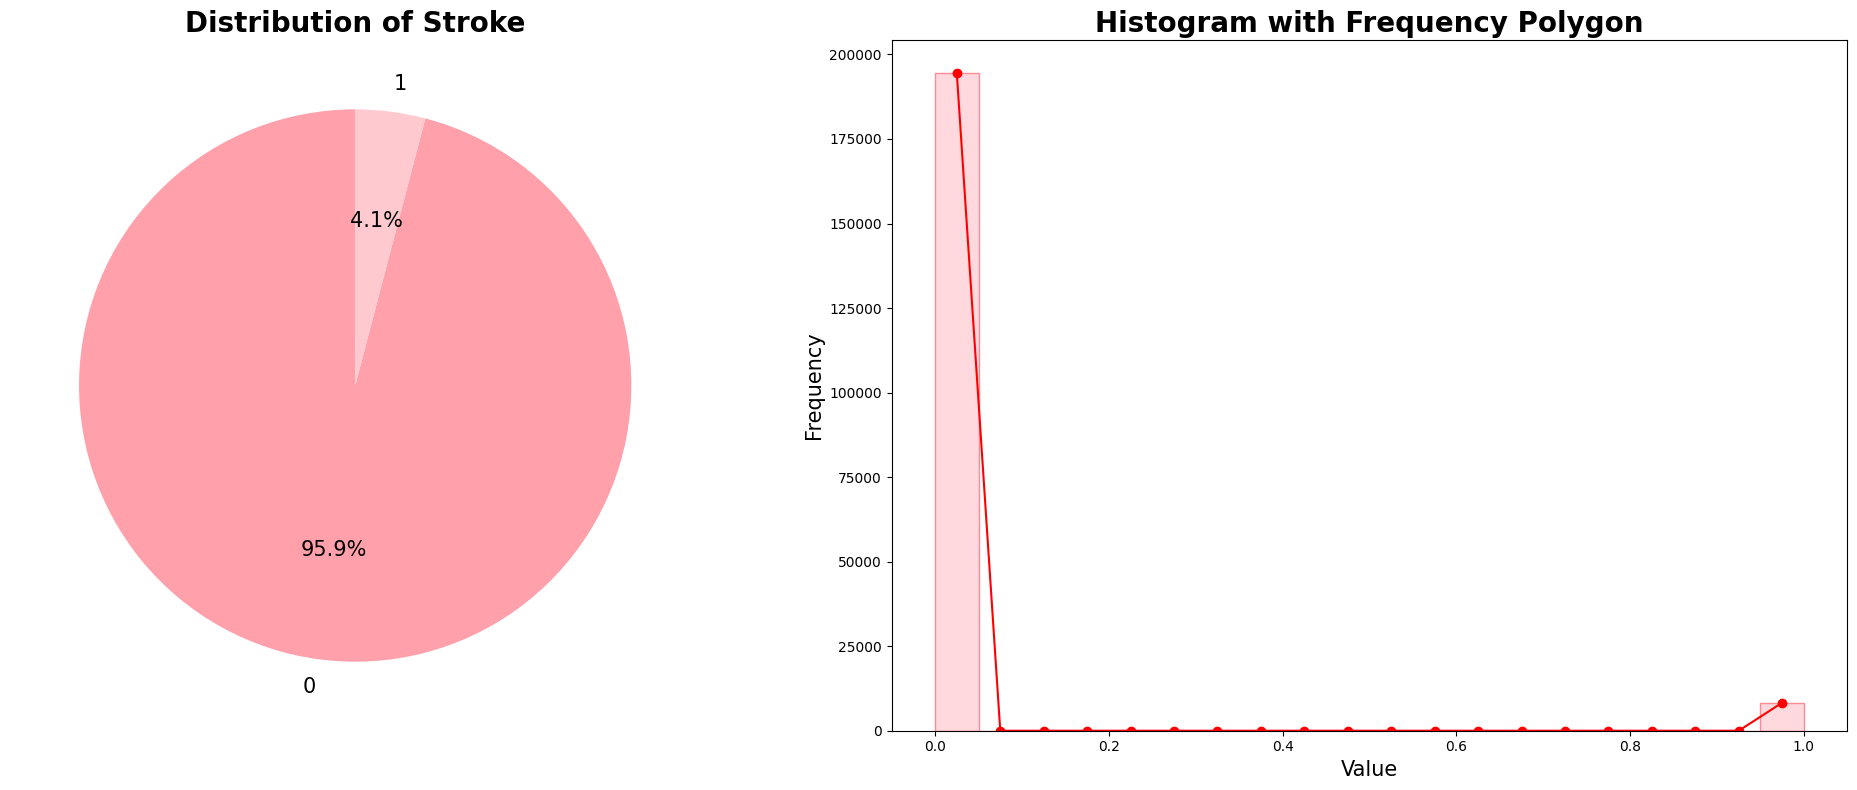

In [46]:
neko.data_frequency("Stroke", df_train_cleaned)

#### 2.8.4 Outliers Detection

In [47]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Stroke"]))

╭─────────────────┬─────────╮
│ Key             │  Value  │
├─────────────────┼─────────┤
│ Unique Outliers │    1    │
├─────────────────┼─────────┤
│ Lower Bound     │    0    │
├─────────────────┼─────────┤
│ Upper Bound     │    0    │
├─────────────────┼─────────┤
│ Threshold       │   1.5   │
├─────────────────┼─────────┤
│ Total Outliers  │  8289   │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `Stroke` exhibits a binary distribution, with the majority of patients having no history of stroke (`0`). This distribution suggests that strokes are less prevalent in the dataset.

- **Outliers:**
    The feature `Stroke` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.9: Heart Disease or Attack (`HeartDiseaseorAttack`)


#### 2.9.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


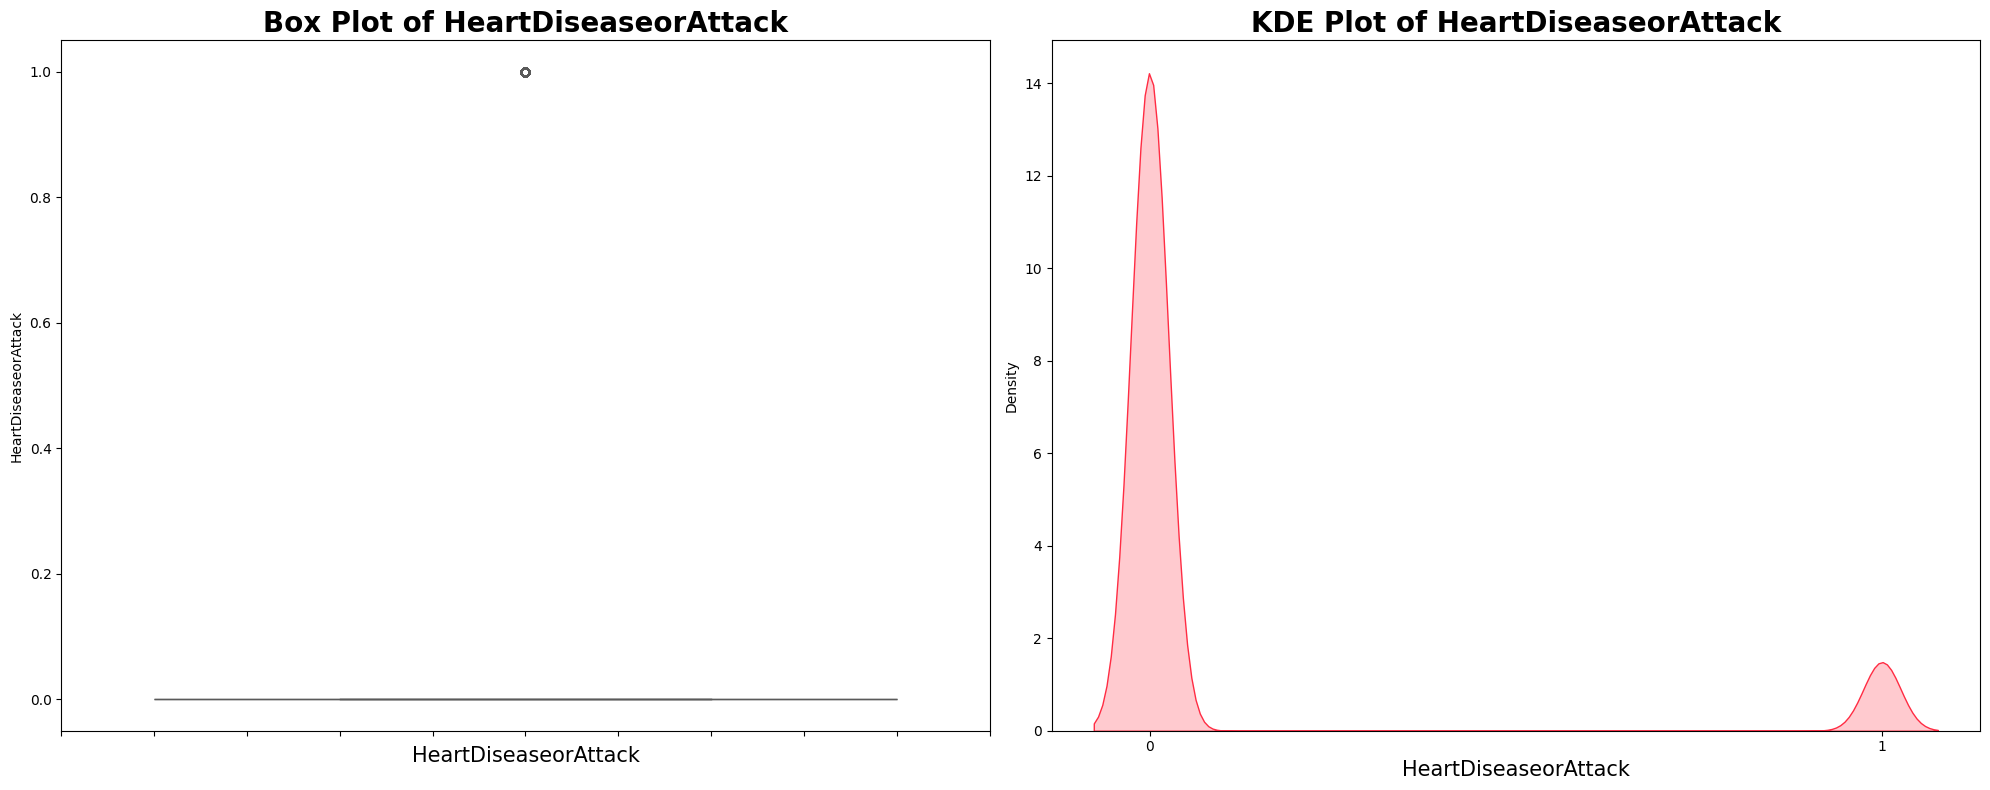

In [48]:
neko.data_visualization("HeartDiseaseorAttack", df_train_cleaned)

#### 2.9.2 Data Overview


In [49]:
data_overview("HeartDiseaseorAttack", df_train_cleaned)

Feature Essence (HeartDiseaseorAttack)
╭────┬────────────────────┬──────────────────────╮
│    │ Attribute          │ Value                │
├────┼────────────────────┼──────────────────────┤
│  0 │ Feature            │ HeartDiseaseorAttack │
├────┼────────────────────┼──────────────────────┤
│  1 │ Data Type          │ int64                │
├────┼────────────────────┼──────────────────────┤
│  2 │ Total Values       │ 202736               │
├────┼────────────────────┼──────────────────────┤
│  3 │ Missing Values     │ 0                    │
├────┼────────────────────┼──────────────────────┤
│  4 │ Unique Values      │ 2                    │
├────┼────────────────────┼──────────────────────┤
│  5 │ Minimum Value      │ 0                    │
├────┼────────────────────┼──────────────────────┤
│  6 │ 25th Percentile    │ 0.0                  │
├────┼────────────────────┼──────────────────────┤
│  7 │ Median             │ 0.0                  │
├────┼────────────────────┼────────────────

#### 2.9.3 Frequency Distribution


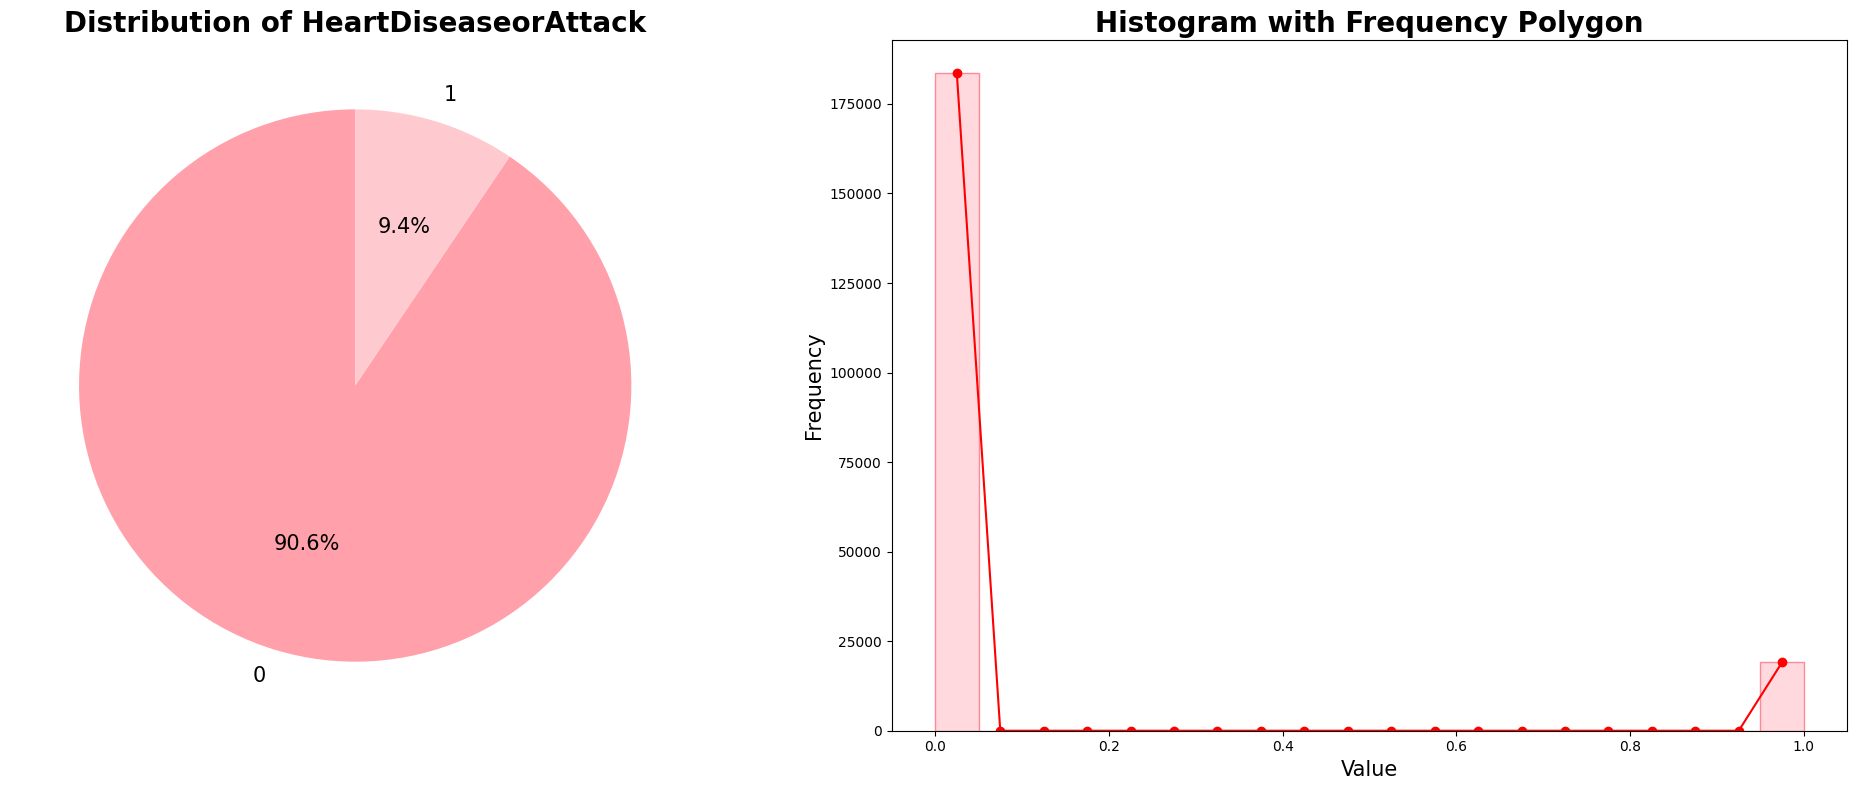

In [50]:
neko.data_frequency("HeartDiseaseorAttack", df_train_cleaned)

#### 2.9.4 Outliers Detection

In [51]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["HeartDiseaseorAttack"]))

╭─────────────────┬─────────╮
│ Key             │  Value  │
├─────────────────┼─────────┤
│ Unique Outliers │    1    │
├─────────────────┼─────────┤
│ Lower Bound     │    0    │
├─────────────────┼─────────┤
│ Upper Bound     │    0    │
├─────────────────┼─────────┤
│ Threshold       │   1.5   │
├─────────────────┼─────────┤
│ Total Outliers  │  19156  │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `HeartDiseaseorAttack` exhibits a binary distribution, with the majority of patients having no history of heart disease or attack (`0`). This distribution suggests that heart diseases or attacks are less prevalent in the dataset.

- **Outliers:**
    The feature `HeartDiseaseorAttack` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.10: Physical Activity (`PhysActivity`)


#### 2.10.1 Data Visualization


C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


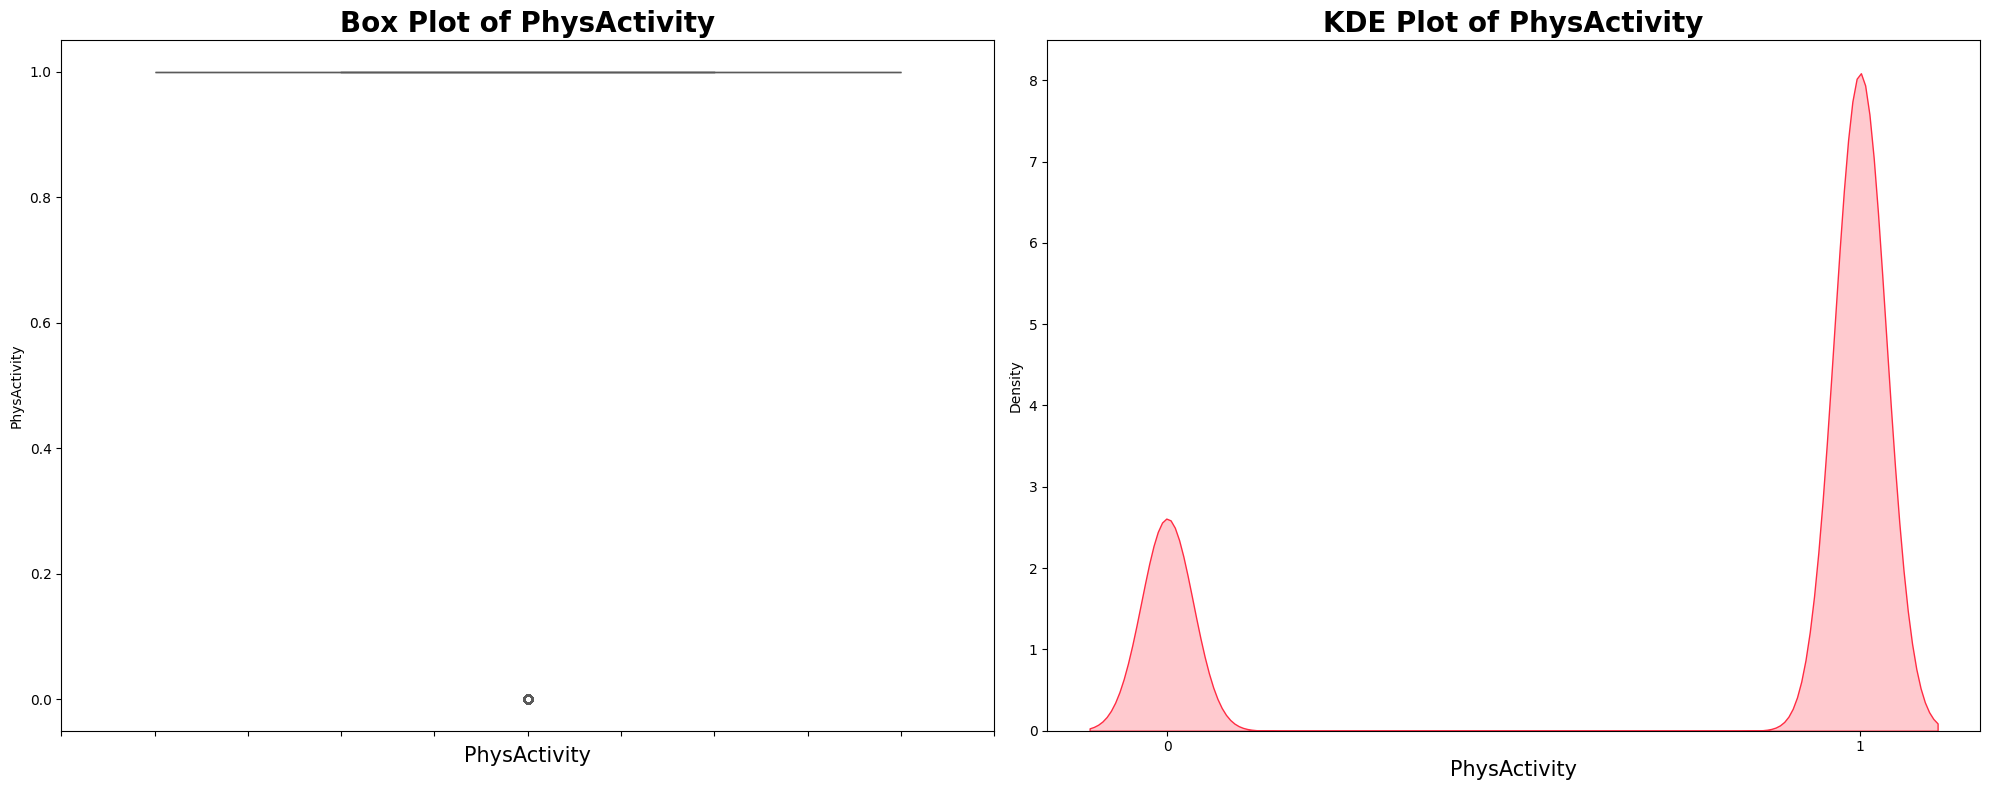

In [52]:
neko.data_visualization("PhysActivity", df_train_cleaned)

#### 2.10.2 Data Overview


In [53]:
data_overview("PhysActivity", df_train_cleaned)

Feature Essence (PhysActivity)
╭────┬────────────────────┬─────────────────────╮
│    │ Attribute          │ Value               │
├────┼────────────────────┼─────────────────────┤
│  0 │ Feature            │ PhysActivity        │
├────┼────────────────────┼─────────────────────┤
│  1 │ Data Type          │ int64               │
├────┼────────────────────┼─────────────────────┤
│  2 │ Total Values       │ 202736              │
├────┼────────────────────┼─────────────────────┤
│  3 │ Missing Values     │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  4 │ Unique Values      │ 2                   │
├────┼────────────────────┼─────────────────────┤
│  5 │ Minimum Value      │ 0                   │
├────┼────────────────────┼─────────────────────┤
│  6 │ 25th Percentile    │ 1.0                 │
├────┼────────────────────┼─────────────────────┤
│  7 │ Median             │ 1.0                 │
├────┼────────────────────┼─────────────────────┤
│  8 │ 75th Percent

#### 2.10.3 Frequency Distribution


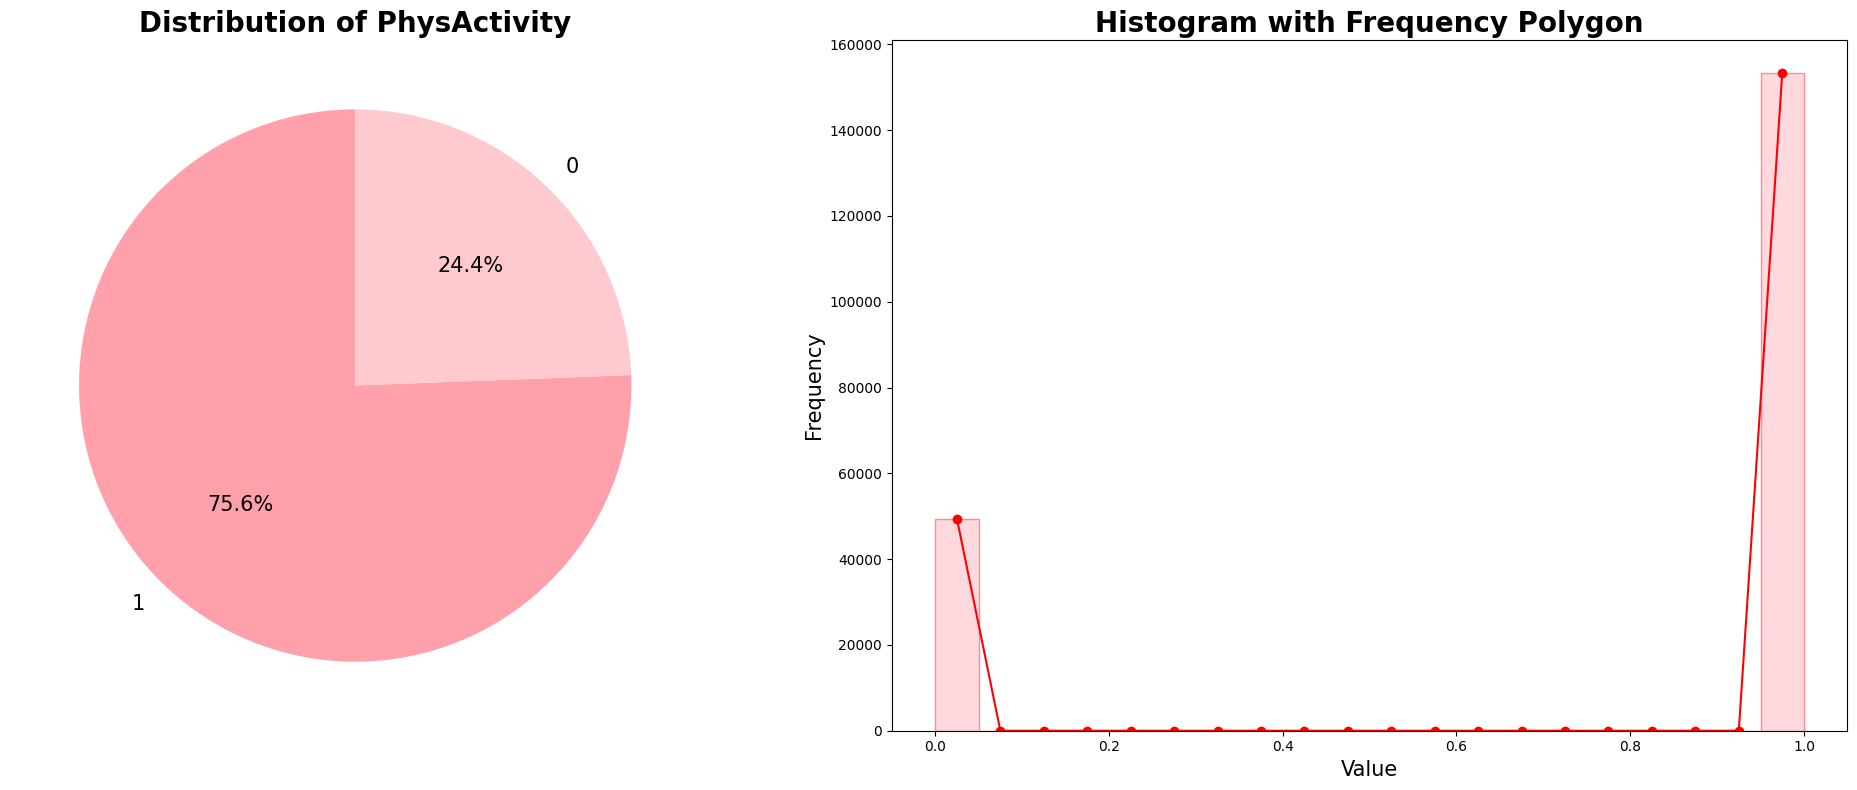

In [54]:
neko.data_frequency("PhysActivity", df_train_cleaned)

#### 2.10.4 Outliers Detection

In [55]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["PhysActivity"]))

╭─────────────────┬─────────╮
│ Key             │  Value  │
├─────────────────┼─────────┤
│ Unique Outliers │    0    │
├─────────────────┼─────────┤
│ Lower Bound     │    1    │
├─────────────────┼─────────┤
│ Upper Bound     │    1    │
├─────────────────┼─────────┤
│ Threshold       │   1.5   │
├─────────────────┼─────────┤
│ Total Outliers  │  49455  │
╰─────────────────┴─────────╯


### **Conclusion**:

- **Distribution:**
  The feature `PhysActivity` exhibits a binary distribution, with the majority of patients engaging in physical activity in the past 30 days (`1`). This distribution suggests that physical activity is prevalent in the dataset.

- **Outliers:**
  The feature `PhysActivity` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.11: Fruits Consumption (`Fruits`)


#### 2.11.1 Data Visualization


In [ ]:
neko.data_visualization("Fruits", df_train_cleaned)

C:\Users\huuqu\Academic\RMIT\Machine Learning\COSC2753_A1_S3927776_DOANHUUQUOC\notebooks\data_analysis\../..\scripts\neko.py:371: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column_name].replace([np.inf, -np.inf], np.nan, inplace=True)


#### 2.11.2 Data Overview


In [ ]:
data_overview("Fruits", df_train_cleaned)

#### 2.11.3 Frequency Distribution


In [ ]:
neko.data_frequency("Fruits", df_train_cleaned)

#### 2.11.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Fruits"]))

### **Conclusion**:

- **Distribution:**
  The feature `Fruits` exhibits a binary distribution, with the majority of patients consuming fruits at least once a day (`1`). This distribution suggests that fruit consumption is prevalent in the dataset.

- **Outliers:**
    The feature `Fruits` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.12: Vegetables Consumption (`Veggies`)


#### 2.12.1 Data Visualization


In [ ]:
neko.data_visualization("Veggies", df_train_cleaned)

#### 2.12.2 Data Overview


In [ ]:
data_overview("Veggies", df_train_cleaned)

#### 2.12.3 Frequency Distribution


In [ ]:
neko.data_frequency("Veggies", df_train_cleaned)

#### 2.12.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Veggies"]))

### **Conclusion**:

- **Distribution:**
  The feature `Veggies` exhibits a binary distribution, with the majority of patients consuming vegetables at least once a day (`1`). This distribution suggests that vegetable consumption is prevalent in the dataset.

- **Outliers:**
  The feature `Veggies` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.13: Heavy Alcohol Consumption (`HvyAlcoholConsump`)


#### 2.13.1 Data Visualization

In [ ]:
neko.data_visualization("HvyAlcoholConsump", df_train_cleaned)

#### 2.13.2 Data Overview

In [ ]:
data_overview("HvyAlcoholConsump", df_train_cleaned)

#### 2.13.3 Frequency Distribution

In [ ]:
neko.data_frequency("HvyAlcoholConsump", df_train_cleaned)

#### 2.13.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["HvyAlcoholConsump"]))

### **Conclusion**:

- **Distribution:**
  The feature `HvyAlcoholConsump` exhibits a binary distribution, with the majority of patients not engaging in heavy alcohol consumption (`0`). This distribution suggests that heavy alcohol consumption is less prevalent in the dataset.

- **Outliers:**
  The feature `HvyAlcoholConsump` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.14: Healthcare Coverage (`AnyHealthcare`)


#### 2.14.1 Data Visualization

In [ ]:
neko.data_visualization("AnyHealthcare", df_train_cleaned)

#### 2.14.2 Data Overview

In [ ]:
data_overview("AnyHealthcare", df_train_cleaned)

#### 2.14.3 Frequency Distribution

In [ ]:
neko.data_frequency("AnyHealthcare", df_train_cleaned)

#### 2.14.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["AnyHealthcare"]))

### **Conclusion**:

- **Distribution:**
  The feature `AnyHealthcare` exhibits a binary distribution, with the majority of patients having healthcare coverage (`1`). This distribution suggests that healthcare coverage is prevalent in the dataset.

- **Outliers:**
  The feature `AnyHealthcare` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.15: Unable to See Doctor Due to Cost (`NoDocbcCost`)


#### 2.15.1 Data Visualization

In [ ]:
neko.data_visualization("NoDocbcCost", df_train_cleaned)

#### 2.15.2 Data Overview

In [ ]:
data_overview("NoDocbcCost", df_train_cleaned)

#### 2.15.3 Frequency Distribution

In [ ]:
neko.data_frequency("NoDocbcCost", df_train_cleaned)

#### 2.15.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["NoDocbcCost"]))

### **Conclusion**:

- **Distribution:**
  The feature `NoDocbcCost` exhibits a binary distribution, with the majority of patients being able to see a doctor due to cost (`0`). This distribution suggests that cost is not a significant barrier to healthcare access in the dataset.

- **Outliers:**
  The feature `NoDocbcCost` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.16: General Health (`GenHlth`)


#### 2.16.1 Data Visualization

In [ ]:
neko.data_visualization("GenHlth", df_train_cleaned)

#### 2.16.2 Data Overview

In [ ]:
data_overview("GenHlth", df_train_cleaned)

#### 2.16.3 Frequency Distribution

In [ ]:
neko.data_frequency("GenHlth", df_train_cleaned)

#### 2.16.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["GenHlth"]))

### **Conclusion**:

- **Distribution:**
  The feature `GenHlth` exhibits an ordinal distribution, with patients rating their general health on a scale of `1` to `5`. This distribution suggests that general health varies across the dataset. The majority of patients rate their general health as `4` or `5`.

- **Outliers:**
  The feature `GenHlth` is ordinal, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.17: Mental Health (`MentHlth`)


#### 2.17.1 Data Visualization

In [ ]:
neko.data_visualization("MentHlth", df_train_cleaned)

#### 2.17.2 Data Overview

In [ ]:
data_overview("MentHlth", df_train_cleaned)

#### 2.17.3 Frequency Distribution

In [ ]:
neko.data_frequency("MentHlth", df_train_cleaned, is_pie_chart=False)

#### 2.17.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["MentHlth"]))

### **Conclusion**:

- **Note:**
  While the specified range for this feature is `1` to `30`, domain knowledge suggests that a value of 0 could still be acceptable. This value would indicate a patient with no health problems in the last 30 days.
- **Distribution:**
  The feature `MentHlth` exhibits a right-skewed distribution, with the majority of patients reporting fewer days of poor mental health in the past 30 days. The distribution suggests that mental health concerns are less prevalent in the dataset.

- **Outliers:**
  The data contains `29,056` outliers with mental health days outside the expected range (`1`-`30`), using IQR-range based method. We will later address these outliers using a more suitable detection method based on model performance evaluation (rather than solely IQR) and handle them appropriately in a later stage.

- **Normalization:**
  Given the skewed distribution, we may consider applying scaling techniques to normalize the data before model training. This decision will be finalized after evaluating the impact on model performance.


### 2.18: Physical Health (`PhysHlth`)


#### 2.18.1 Data Visualization

In [ ]:
neko.data_visualization("PhysHlth", df_train_cleaned)

#### 2.18.2 Data Overview

In [ ]:
data_overview("PhysHlth", df_train_cleaned)

#### 2.18.3 Frequency Distribution

In [ ]:
neko.data_frequency("PhysHlth", df_train_cleaned, is_pie_chart=False)

#### 2.18.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["PhysHlth"]))

### **Conclusion**:

- **Note:**
  While the specified range for this feature is `1` to `30`, domain knowledge suggests that a value of 0 could still be acceptable. This value would indicate a patient with no health problems in the last 30 days.

- **Distribution:**
  The feature `PhysHlth` exhibits a right-skewed distribution, with the majority of patients reporting fewer days of poor physical health in the past 30 days. The distribution suggests that physical health concerns are less prevalent in the dataset.

- **Outliers:**
  The data contains `32,909` outliers with physical health days outside the expected range (`1`-`30`), using IQR-range based method. We will later address these outliers using a more suitable detection method based on model performance evaluation (rather than solely IQR) and handle them appropriately in a later stage.

- **Normalization:**
  Given the skewed distribution, we may consider applying scaling techniques to normalize the data before model training. This decision will be finalized after evaluating the impact on model performance.


### 2.19: Difficulty Walking or Climbing Stairs (`DiffWalk`)


#### 2.19.1 Data Visualization

In [ ]:
neko.data_visualization("DiffWalk", df_train_cleaned)

#### 2.19.2 Data Overview

In [ ]:
data_overview("DiffWalk", df_train_cleaned)

#### 2.9.3 Frequency Distribution

In [ ]:
neko.data_frequency("DiffWalk", df_train_cleaned)

#### 2.19.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["DiffWalk"]))

### **Conclusion**

- **Distribution:**
  The feature `DiffWalk` exhibits a binary distribution, with the majority of patients reporting no serious difficulty walking or climbing stairs (`0`). This distribution suggests that mobility issues are less prevalent in the dataset.

- **Outliers:**
  The feature `DiffWalk` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.20: Sex (`Sex`)


#### 2.20.1 Data Visualization

In [ ]:
neko.data_visualization("Sex", df_train_cleaned)

#### 2.20.2 Data Overview

In [ ]:
data_overview("Sex", df_train_cleaned)

#### 2.20.3 Frequency Distribution

In [ ]:
neko.data_frequency("Sex", df_train_cleaned)

#### 2.20.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Sex"]))

### **Conclusion**:

- **Distribution:**
  The feature `Sex` exhibits a binary distribution with a majority of values coded as `0` (female) and `1` (male). However, this might not accurately reflect the true gender distribution. Further investigation is needed to ensure the data is correct.

- **Outliers:**
  The feature `Sex` is categorical, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.21: Age (`Age`)


#### 2.21.1 Data Visualization

In [ ]:
neko.data_visualization("Age", df_train_cleaned)

#### 2.21.2 Data Overview

In [ ]:
data_overview("Age", df_train_cleaned)

#### 2.21.3 Frequency Distribution

In [ ]:
neko.data_frequency("Age", df_train_cleaned, is_pie_chart=False)

#### 2.21.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Age"]))

### **Conclusion**:

- **Distribution:**
  The feature `Age` exhibits an ordinal distribution, with patients categorized into age groups ranging from `1` to `13`. This distribution suggests that age varies across the dataset, with a higher representation of patients in the `7-11` age group.

- **Outliers:**
    The feature `Age` is ordinal, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.22: Education (`Education`)


#### 2.22.1 Data Visualization  

In [ ]:
neko.data_visualization("Education", df_train_cleaned)

#### 2.22.2 Data Overview

In [ ]:
data_overview("Education", df_train_cleaned)

#### 2.22.3 Frequency Distribution

In [ ]:
neko.data_frequency("Education", df_train_cleaned, is_pie_chart=False)

#### 2.22.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Education"]))

### **Conclusion**:

- **Distribution:**
  The feature `Education` exhibits an ordinal distribution, with patients categorized into education levels ranging from `1` to `6`. This distribution suggests that education levels vary across the dataset, with a higher representation of patients in the `6` education level. The data is skewed towards higher education levels, highlighting potential imbalances.

- **Outliers:**
  The feature `Education` is ordinal, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.

### 2.23: Income (`Income`)


#### 2.23.1 Data Visualization

In [ ]:
neko.data_visualization("Income", df_train_cleaned)

#### 2.23.2 Data Overview

In [ ]:
data_overview("Income", df_train_cleaned)

#### 2.23.3 Frequency Distribution 

In [ ]:
neko.data_frequency("Income", df_train_cleaned, is_pie_chart=True)

#### 2.23.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["Income"]))

### **Conclusion**:

- **Distribution:**
  The feature `Income` exhibits an ordinal distribution, with patients categorized into income levels ranging from `1` to `8`. This distribution suggests that income levels vary across the dataset, with a higher representation of patients in the `8` income level. The data is skewed towards higher income levels, highlighting potential imbalances.

- **Outliers:**
  The feature `Income` is ordinal, and the concept of outliers is less relevant in this context. However, we will continue to explore outliers in other features to ensure data quality and integrity.


### 2.24: Extra Medical Test (`ExtraMedTest`)


#### 2.24.1 Data Visualization

In [ ]:
neko.data_visualization("ExtraMedTest", df_train_cleaned)

#### 2.24.2 Data Overview

In [ ]:
data_overview("ExtraAlcoholTest", df_train_cleaned)

#### 2.24.3 Frequency Distribution

In [ ]:
neko.data_frequency("ExtraMedTest", df_train_cleaned, is_pie_chart=False)

#### 2.24.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["ExtraMedTest"]))

### **Conclusion**:

- **Distribution:**
  The feature `ExtraMedTest` exhibits a right-skewed distribution, with the majority of patients having test results within the range of `-100` to `100`. The distribution suggests that most patients have test results within the expected range.

- **Outliers:**
  The data contains `0` outliers with test results outside the expected range (`-100`-`100`), using IQR-range based method. We will later address these outliers using a more suitable detection method based on model performance evaluation (rather than solely IQR) and handle them appropriately in a later stage.

- **Normalization:**
  Given the non-balanced, we may consider applying scaling techniques to normalize the data before model training. This decision will be finalized after evaluating the impact on model performance.


### 2.25: Extra Alcohol Test (`ExtraAlcoholTest`)


#### 2.25.1 Data Visualization

In [ ]:
neko.data_visualization("ExtraAlcoholTest", df_train_cleaned)

#### 2.25.2 Data Overview

In [ ]:
data_overview("ExtraAlcoholTest", df_train_cleaned)

#### 2.25.3 Frequency Distribution

In [ ]:
neko.data_frequency("ExtraAlcoholTest", df_train_cleaned, is_pie_chart=False)

#### 2.25.4 Outliers Detection

In [ ]:
print(outlier_detector.find_outliers_iqr(df_train_cleaned["ExtraAlcoholTest"]))

### **Conclusion**:

- **Distribution:**
  The feature `ExtraAlcoholTest` exhibits a right-skewed distribution, with the majority of patients having test results within the range of `-100` to `100`. The distribution suggests that most patients have test results within the expected range.

- **Outliers:**
  The data contains `0` outliers with test results outside the expected range (`-100`-`100`), using IQR-range based method. We will later address these outliers using a more suitable detection method based on model performance evaluation (rather than solely IQR) and handle them appropriately in a later stage.

- **Normalization:**
  Given the non-balanced, we may consider applying scaling techniques to normalize the data before model training. This decision will be finalized after evaluating the impact on model performance.


# IV. Multiivariate Analysis